https://www.kaggle.com/code/surajjha101/predicting-fetal-health-gradient-boost

good notebook : https://www.kaggle.com/code/karnikakapoor/fetal-health-classification/notebook

Context
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

Data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

- Normal

- Suspect

- Pathological

About the data (Description of attributes)
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes: "Normal", "Suspect" & "Pathological". Dataset having the following features:

- baseline value: Baseline Fetal Heart Rate (FHR) (beats per minute)
- accelerations: Number of accelerations per second
- fetal_movement: Number of fetal movements per second
- uterine_contractions: Number of uterine contractions per second
- light_decelerations: Number of light decelerations (LDs) per second
- severe_decelerations: Number of severe decelerations (SDs) per second
- prolongued_decelerations: Number of prolonged decelerations (PDs) per second
- abnormal_short_term_variability: Percentage of time with abnormal short term variability
- mean_value_of_short_term_variability: Mean value of short term variability
- percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long term variability
- mean_value_of_long_term_variability: Mean value of long term variability
- histogram_width: Width of histogram made using all values from a record
- histogram_min: Histogram minimum value
- histogram_max: Histogram maximum value
- histogram_number_of_peaks: Number of peaks in the exam histogram
- histogram_number_of_zeroes: Number of zeros in the exam histogram
- histogram_mode: Histogram mode
- histogram_mean: Histogram mean
- histogram_median: Histogram median
- histogram_variance: Histogram variance
- histogram_tendency: Histogram tendency
- fetal_health: Encoded as 1-Normal; 2-Suspect; 3-Pathological. It is our very target column in the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import missingno as msmo

In [3]:
pd.options.display.max_columns = None

In [4]:
pd.set_option("display.max_colwidth",None)

In [5]:
data= pd.read_csv('fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
data.shape

(2126, 22)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [8]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


<AxesSubplot:>

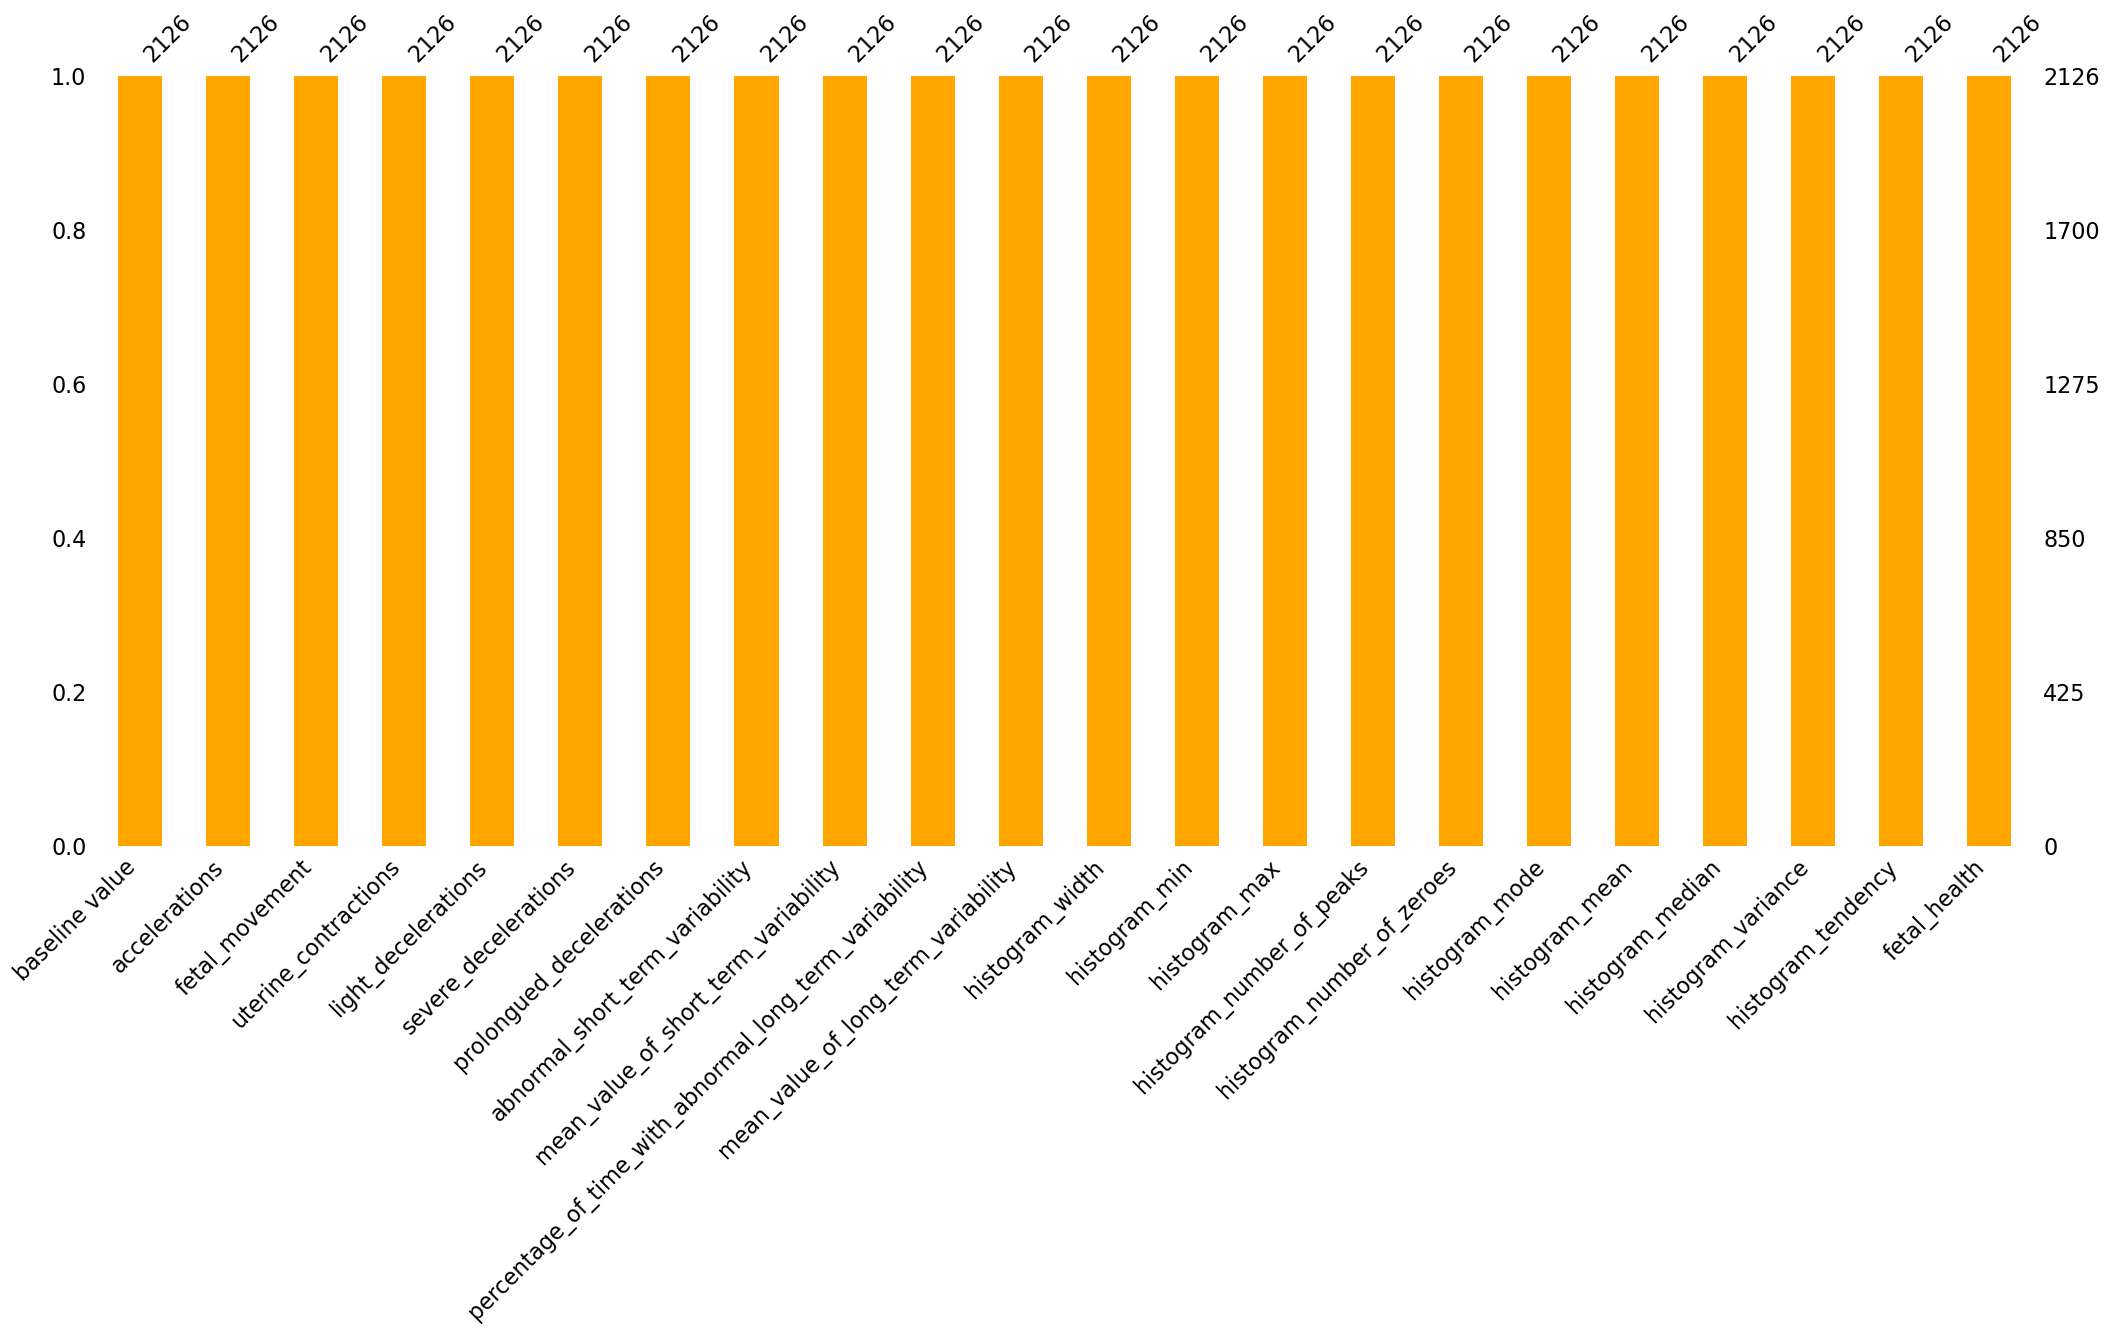

In [9]:
msmo.bar(data,color='orange')

In [10]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


#### Output column distribution

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

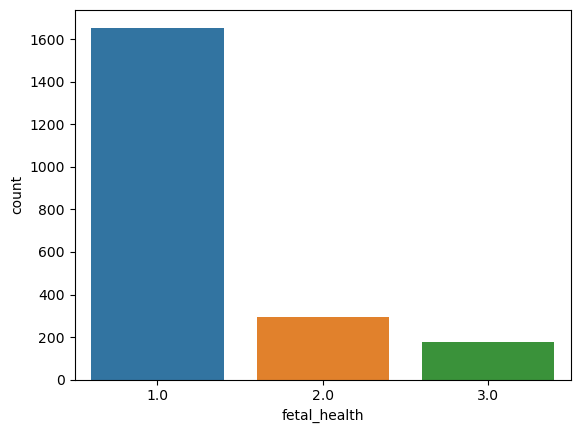

In [12]:
sns.countplot(data=data,x='fetal_health')

In [13]:
data['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

> data is imbalanced

### Conclusion: Data has no null values

## EDA

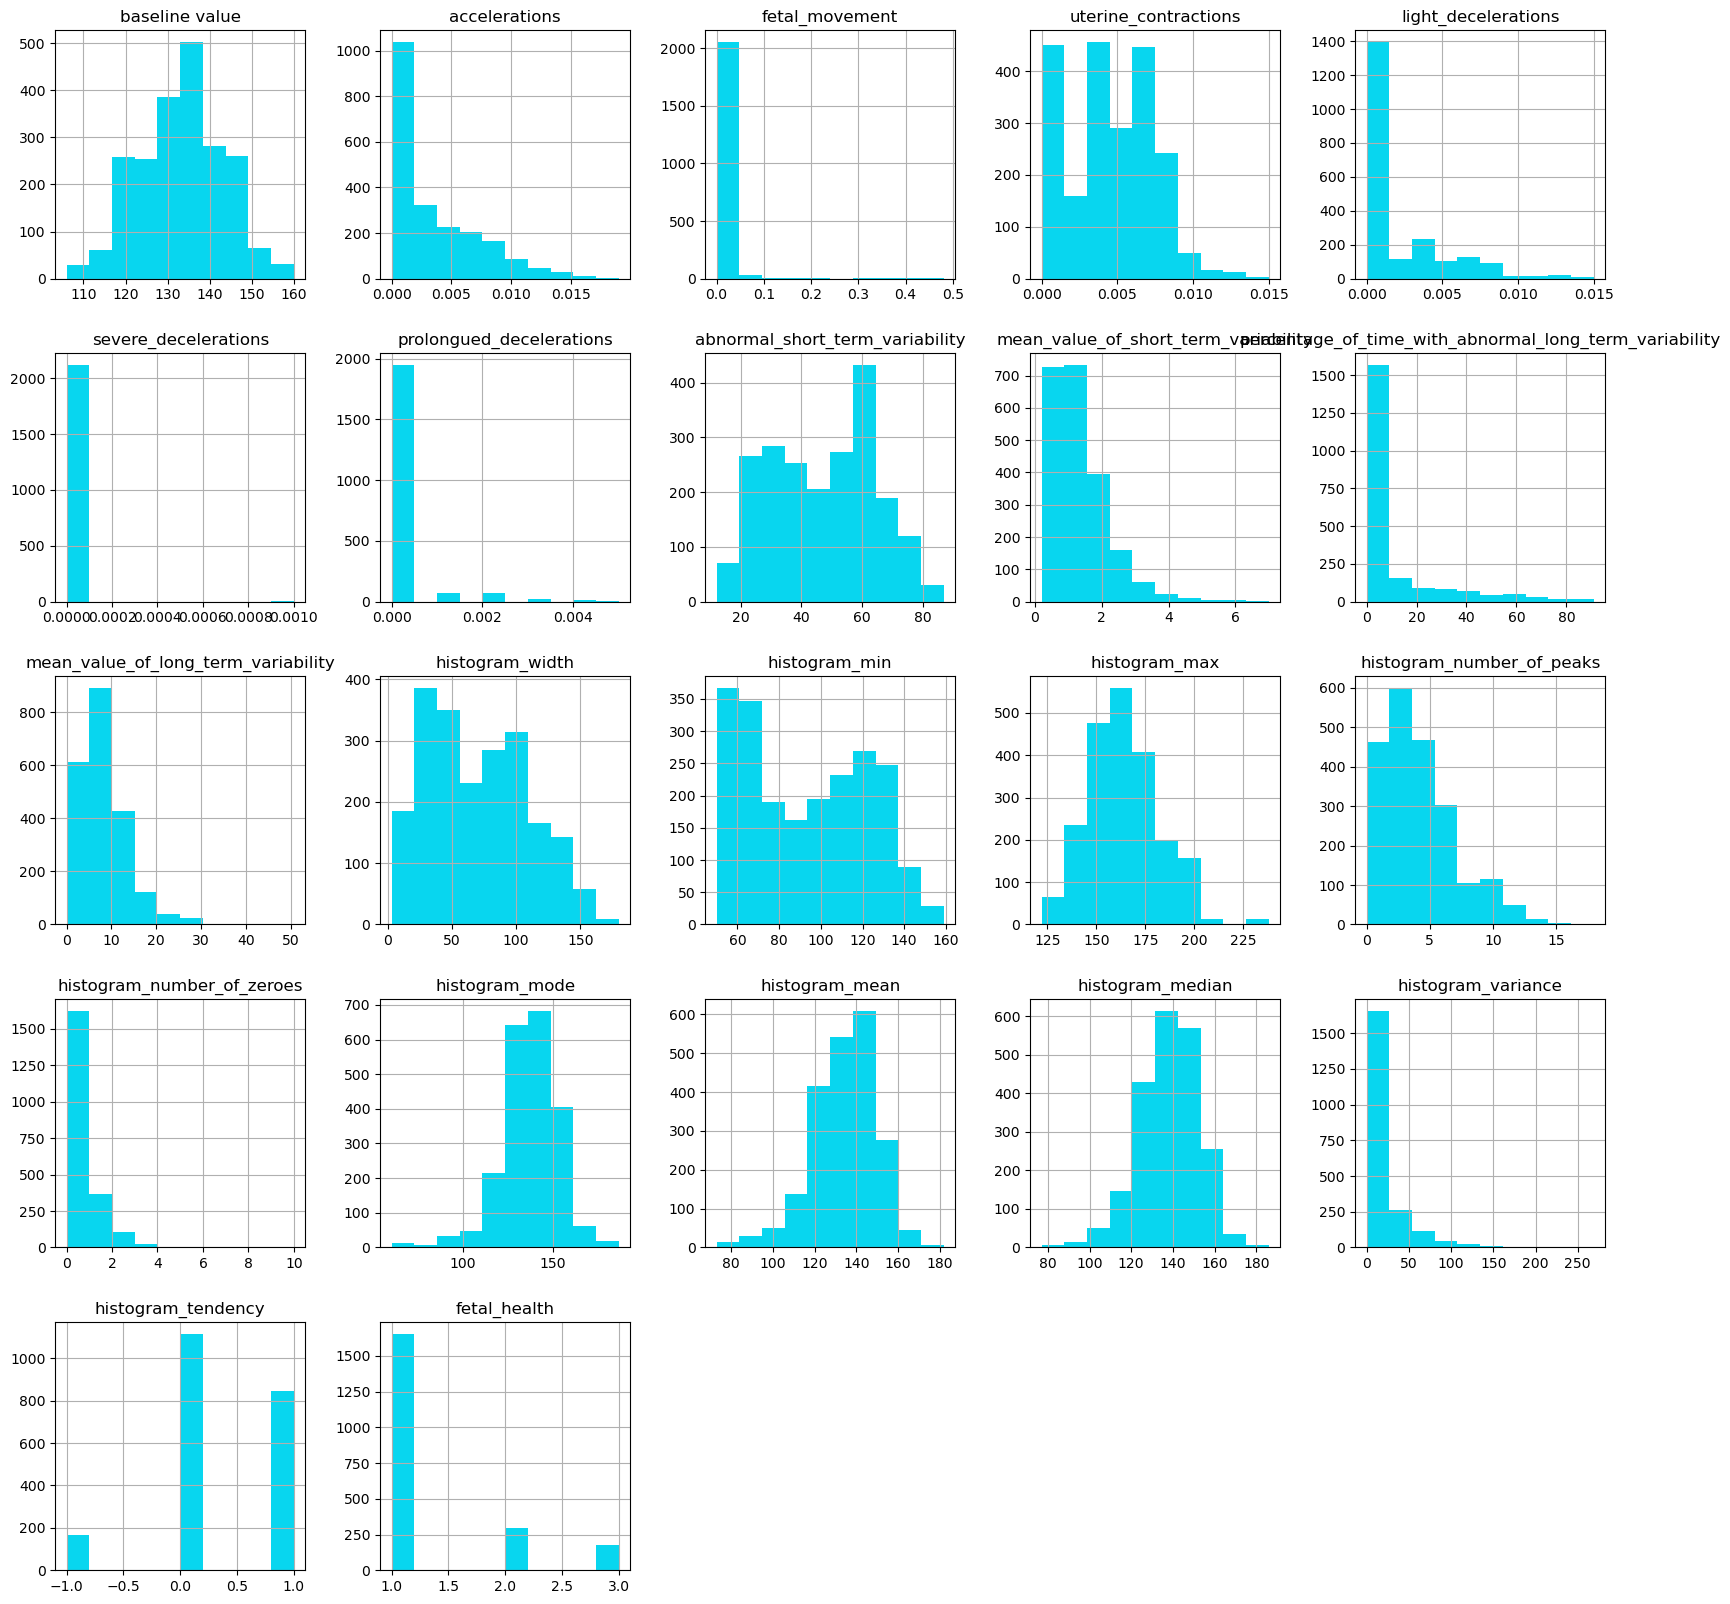

In [14]:
hist_plot = data.hist(figsize=(20,20), color = '#08D6EF')

## Outlier

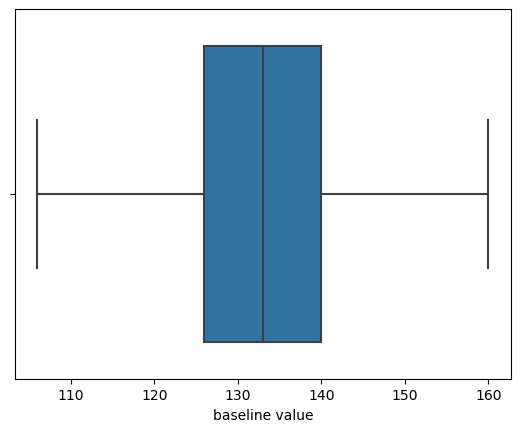

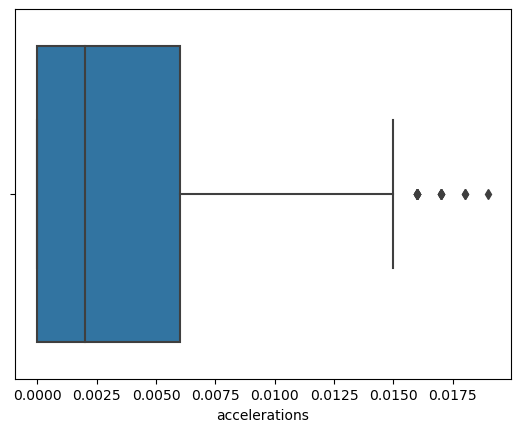

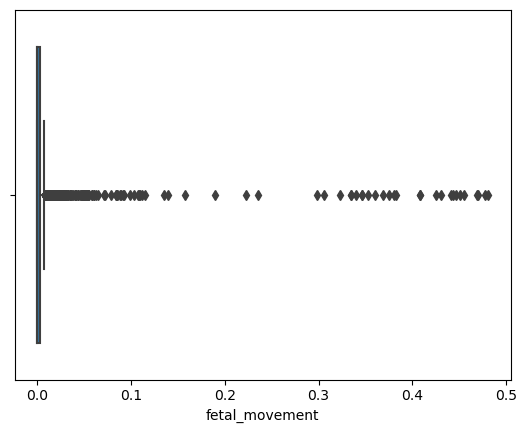

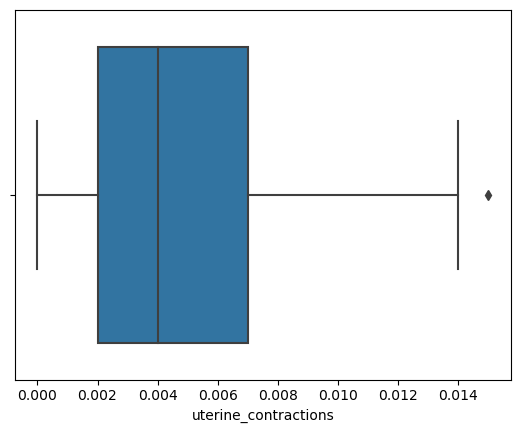

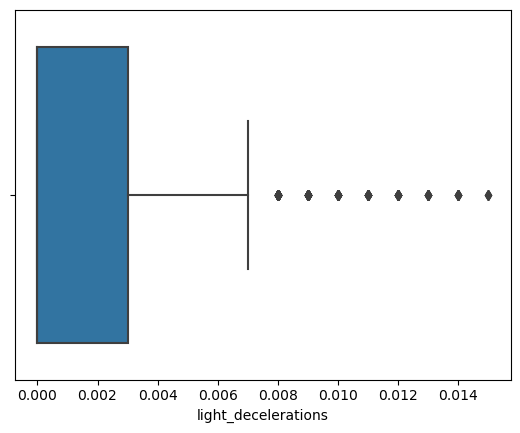

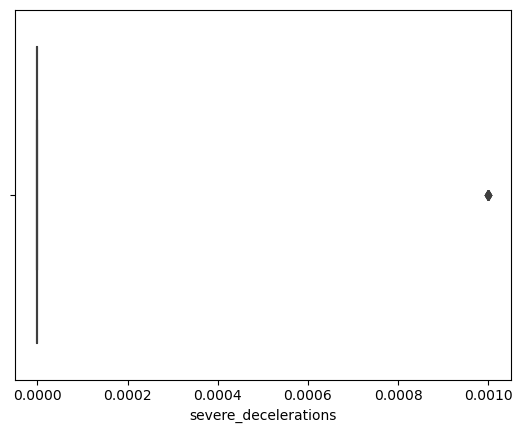

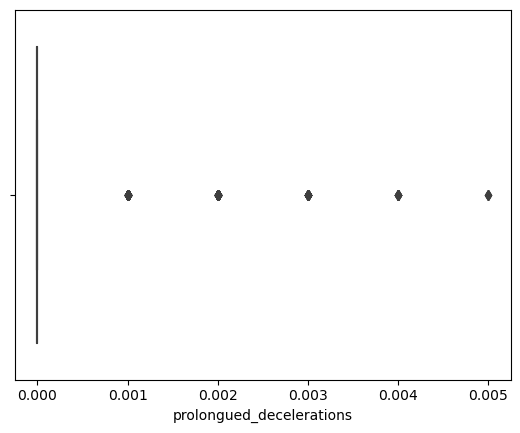

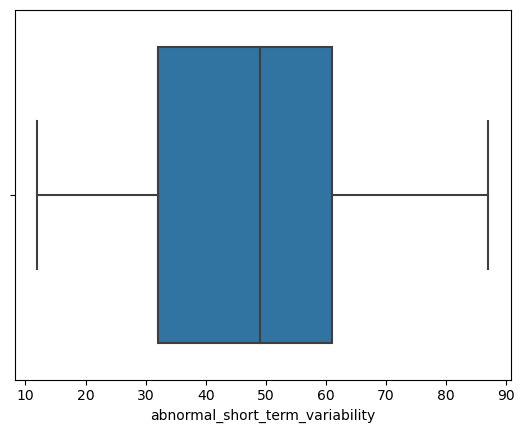

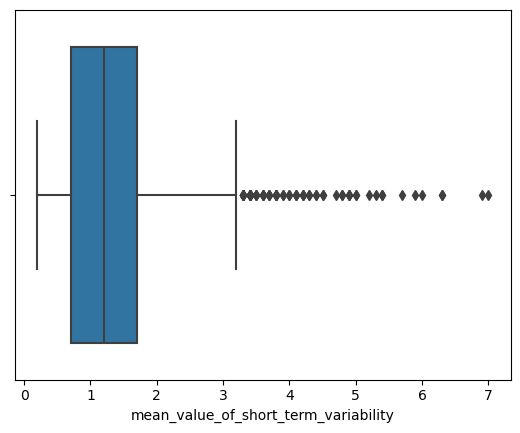

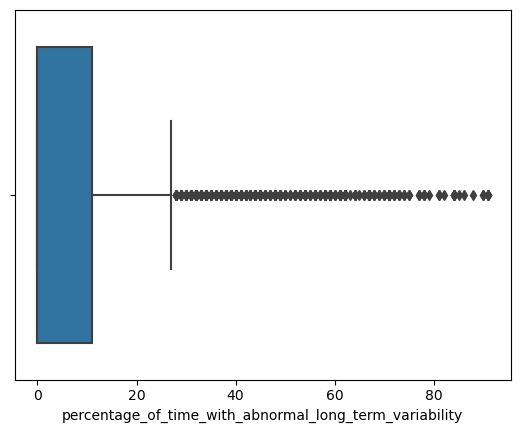

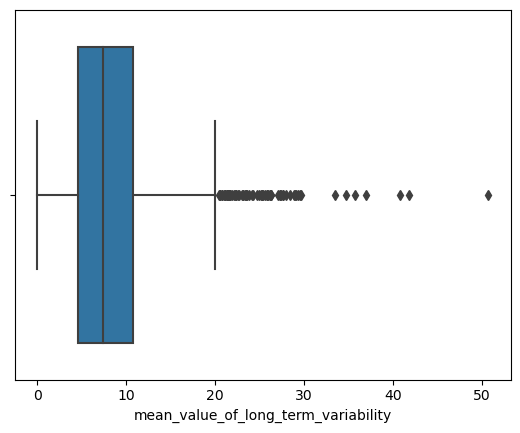

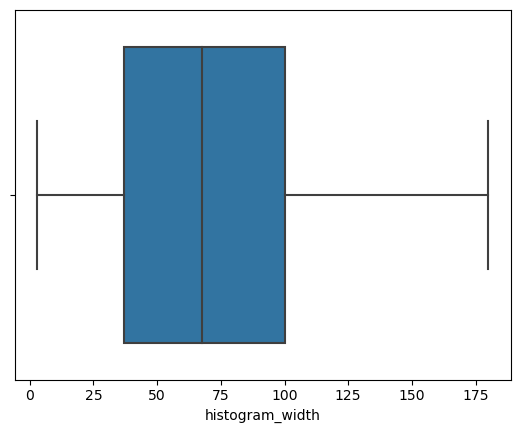

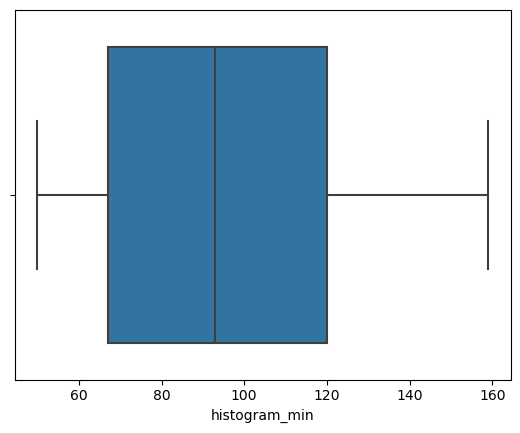

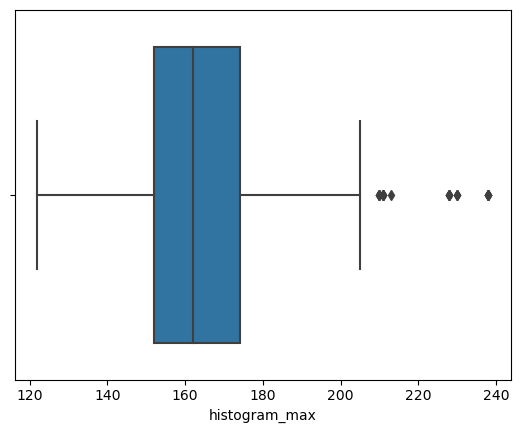

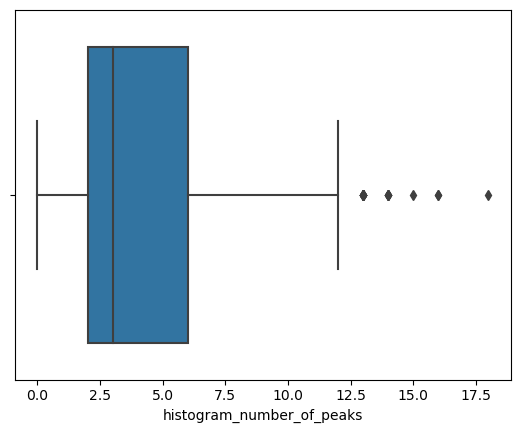

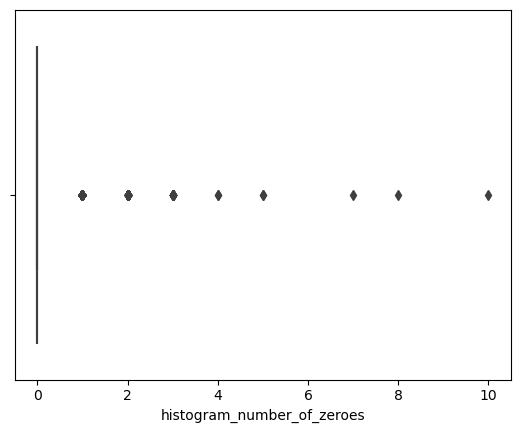

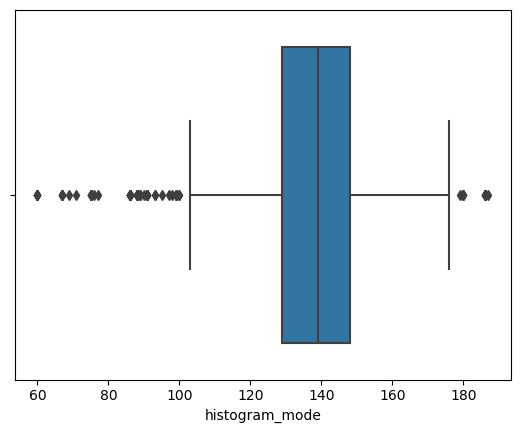

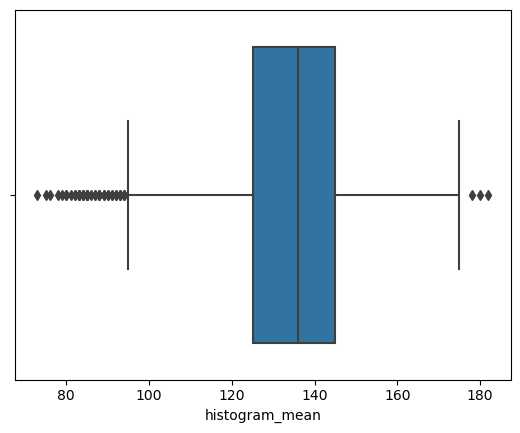

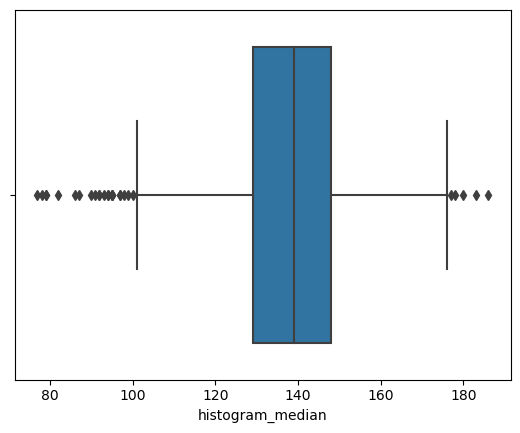

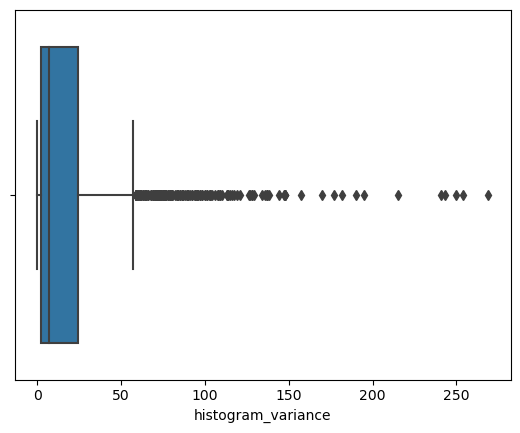

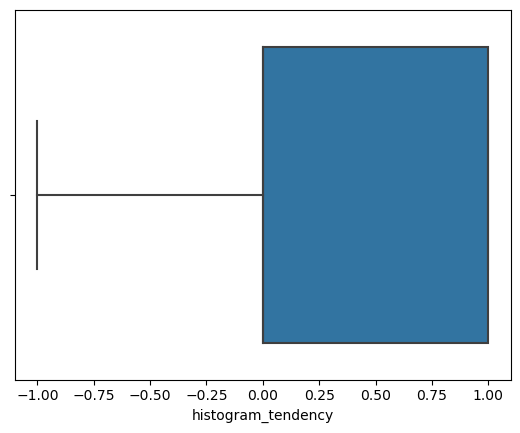

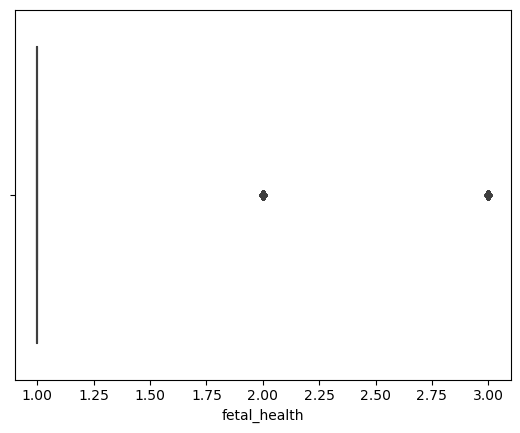

In [15]:
for i in data.columns:
    sns.boxplot(data=data,x=i)
    plt.show()

In [16]:
hist_column = []
kde_column = []

In [17]:
for i in data.columns:
    if len(data[i].value_counts()) < 9:
        hist_column.append(i)
        print(i,"no. of unique values ->",len(data[i].value_counts()))
        print(data[i].value_counts(ascending=False,normalize=True)*100)
        print('--------')
    else:
        kde_column.append(i)
        print(i,"no. of unique values ->",len(data[i].value_counts()))
        print('#############')

baseline value no. of unique values -> 48
#############
accelerations no. of unique values -> 20
#############
fetal_movement no. of unique values -> 102
#############
uterine_contractions no. of unique values -> 16
#############
light_decelerations no. of unique values -> 16
#############
severe_decelerations no. of unique values -> 2
0.000    99.670743
0.001     0.329257
Name: severe_decelerations, dtype: float64
--------
prolongued_decelerations no. of unique values -> 6
0.000    91.627469
0.002     3.386642
0.001     3.292568
0.003     1.128881
0.004     0.423330
0.005     0.141110
Name: prolongued_decelerations, dtype: float64
--------
abnormal_short_term_variability no. of unique values -> 75
#############
mean_value_of_short_term_variability no. of unique values -> 57
#############
percentage_of_time_with_abnormal_long_term_variability no. of unique values -> 87
#############
mean_value_of_long_term_variability no. of unique values -> 249
#############
histogram_width no. of uni

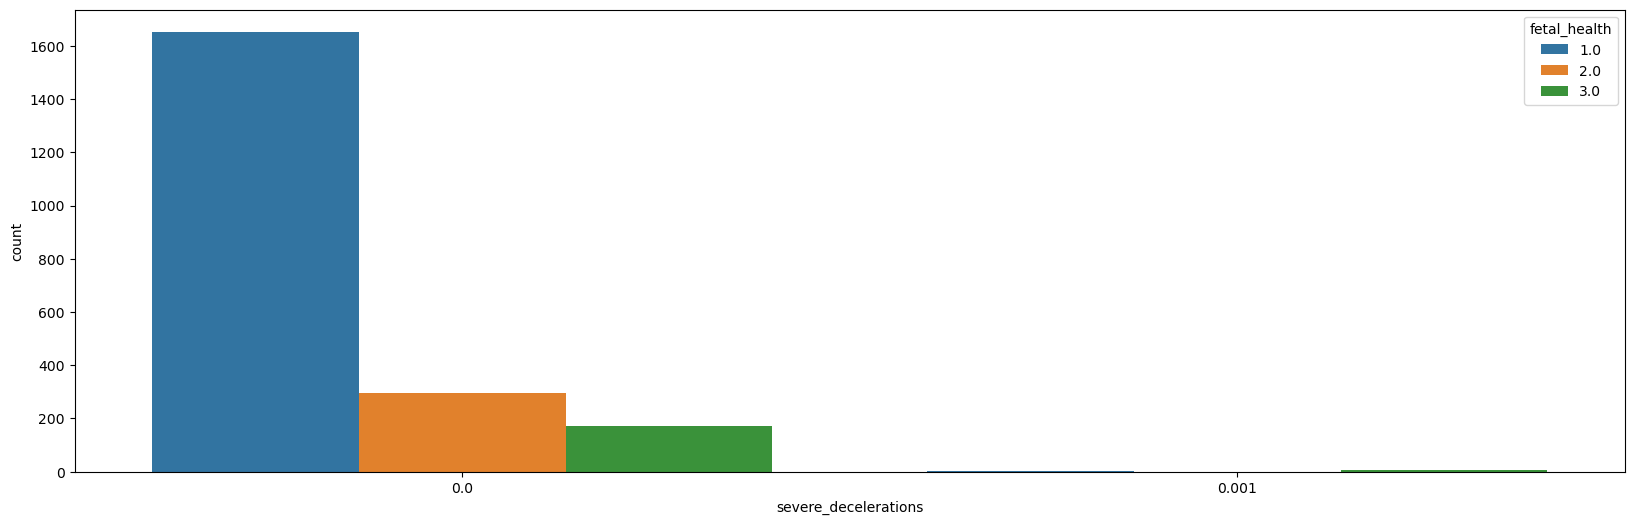

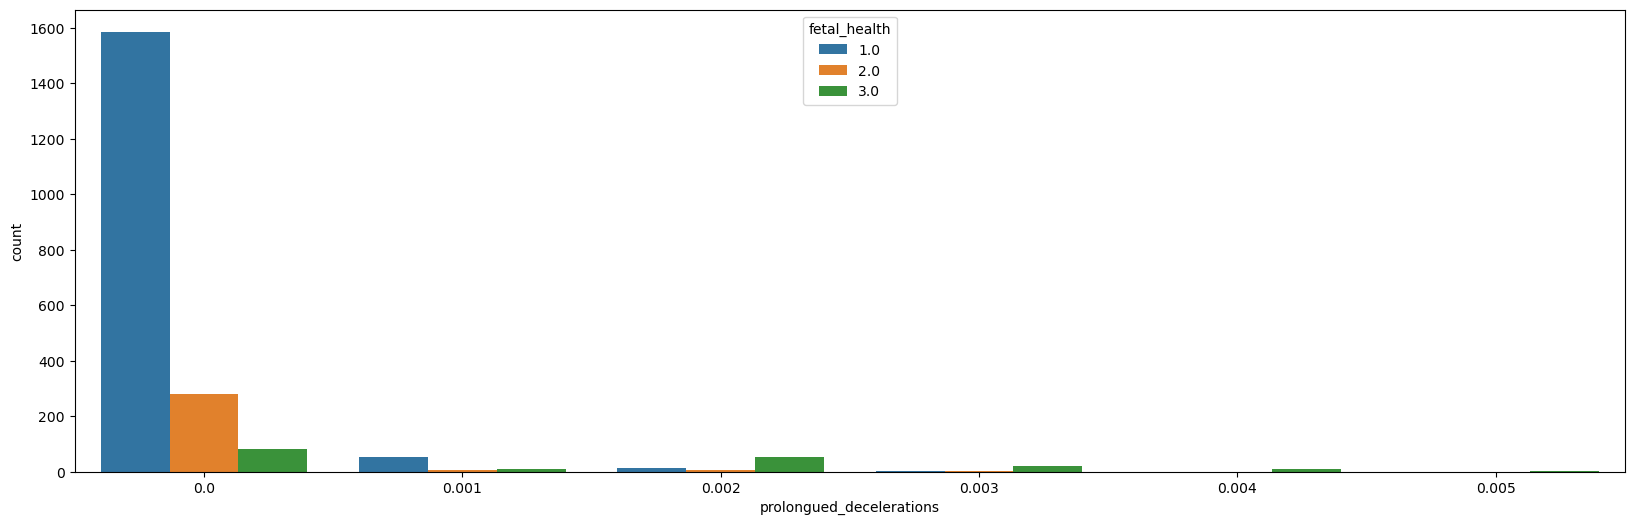

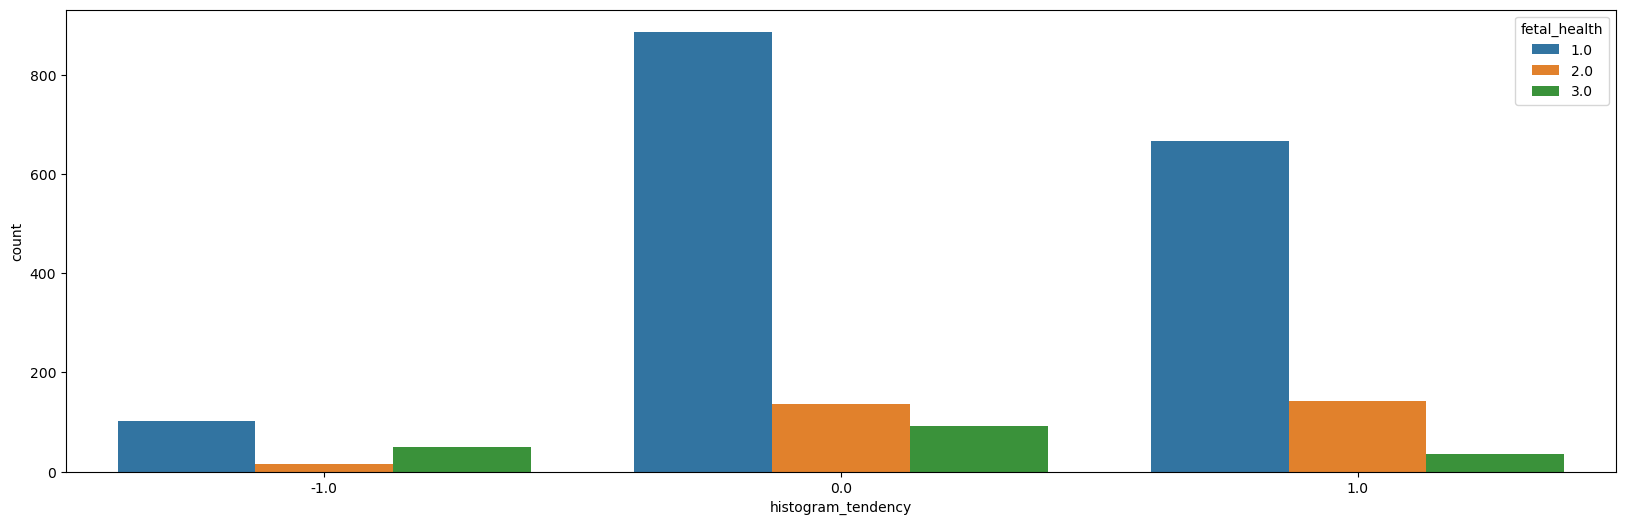

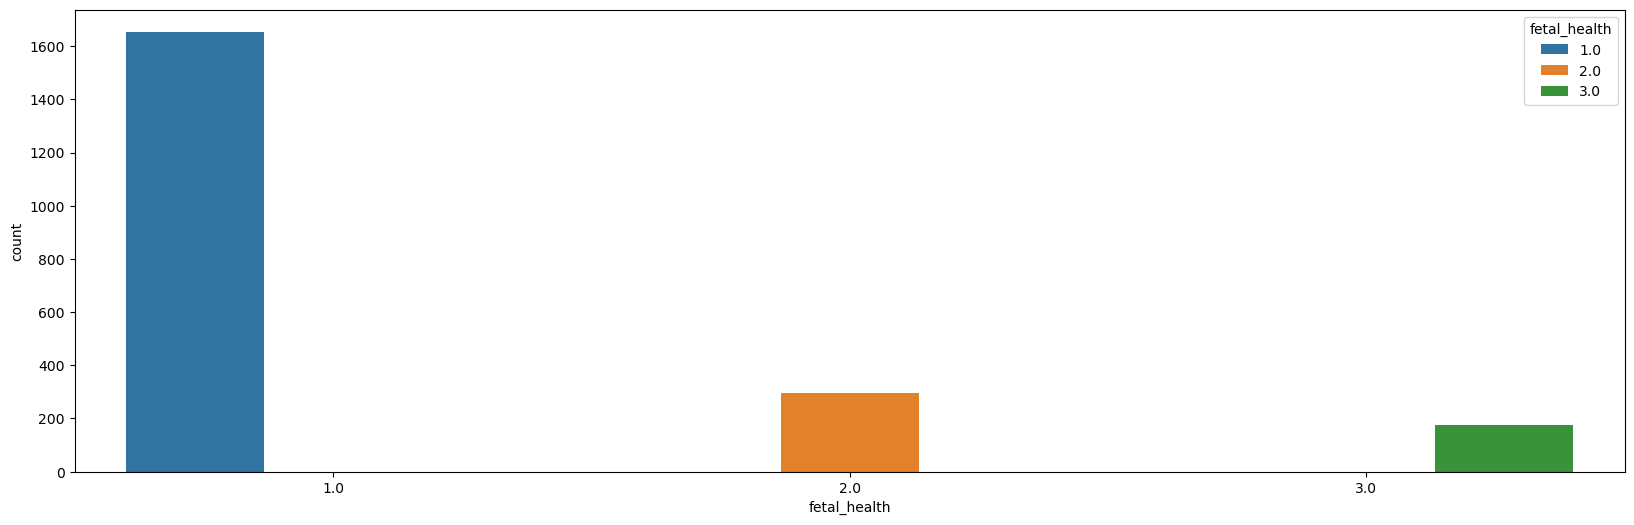

In [18]:
for i in hist_column:
    plt.figure(figsize=(20,6))
    sns.countplot(data=data, x = i,hue='fetal_health')
    plt.show()

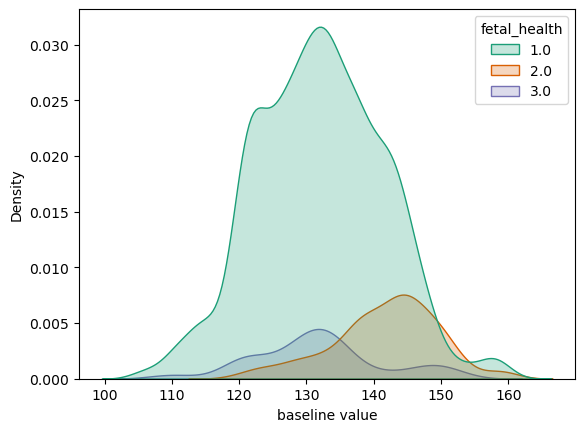

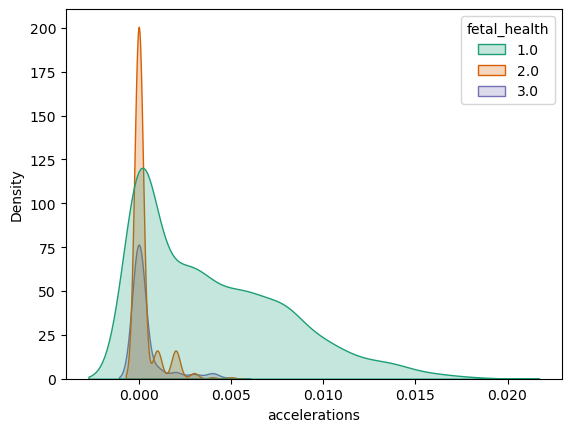

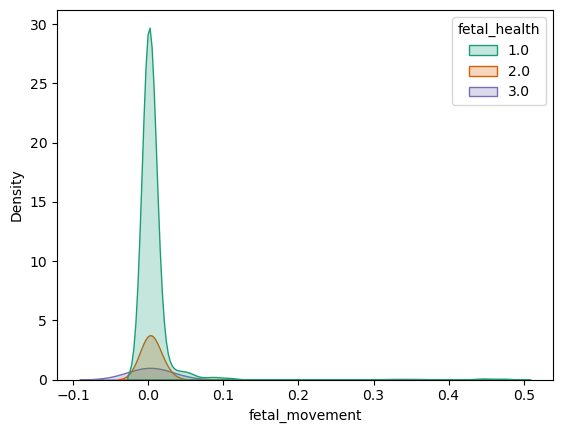

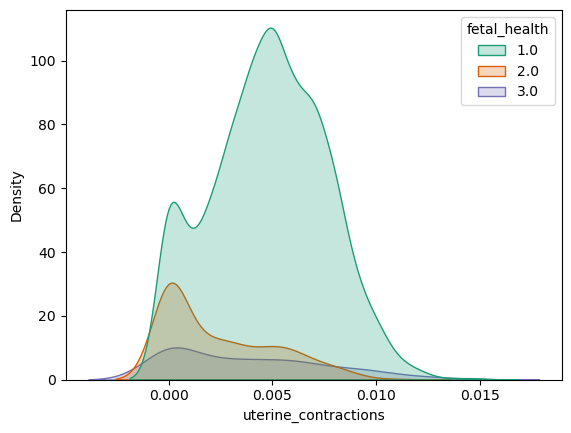

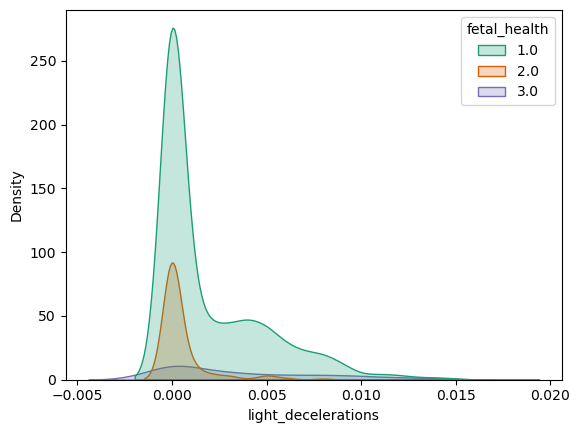

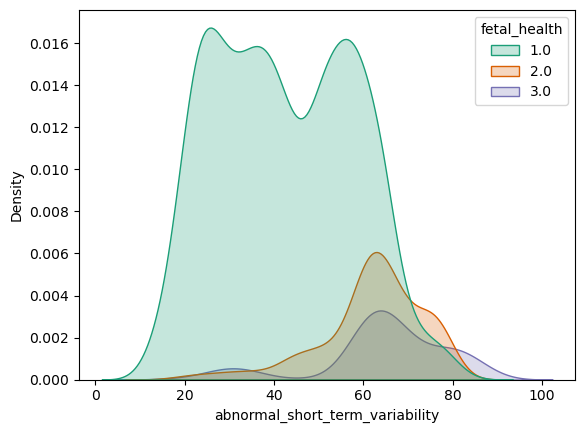

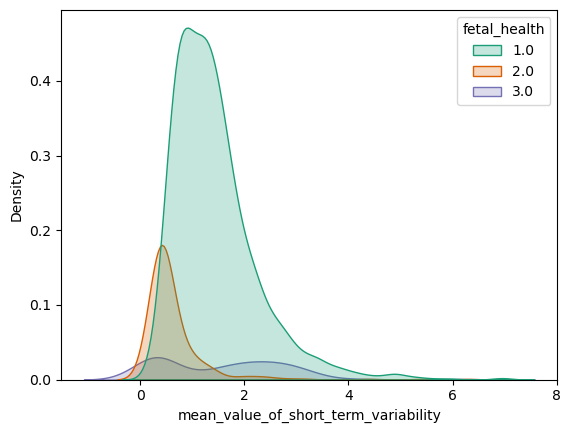

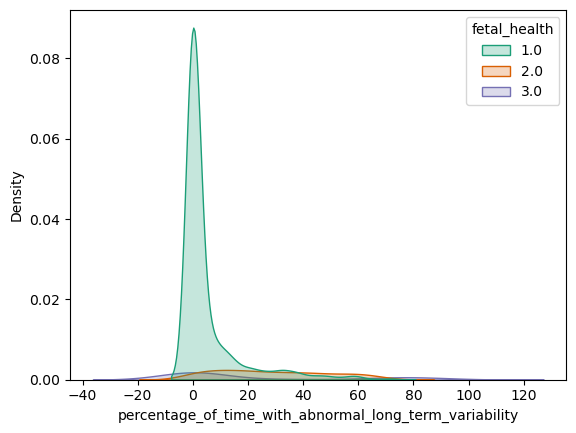

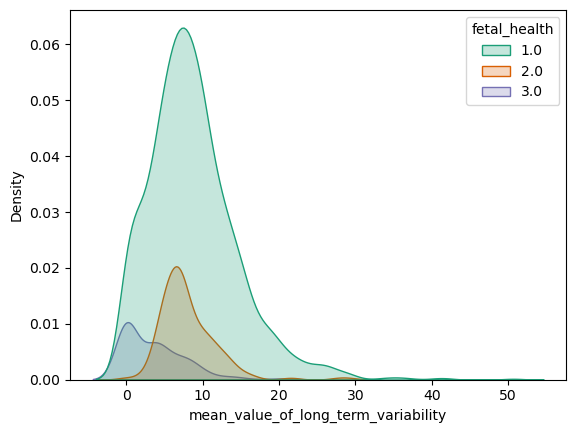

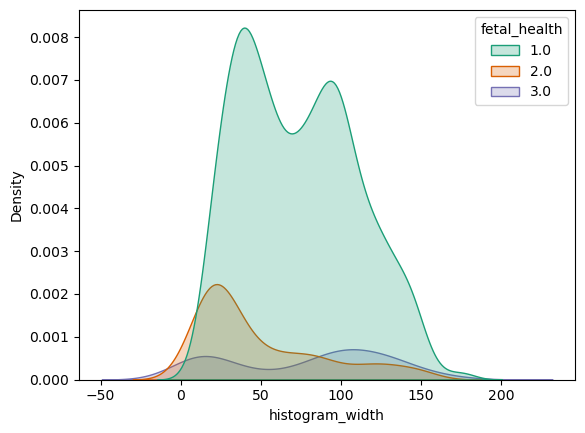

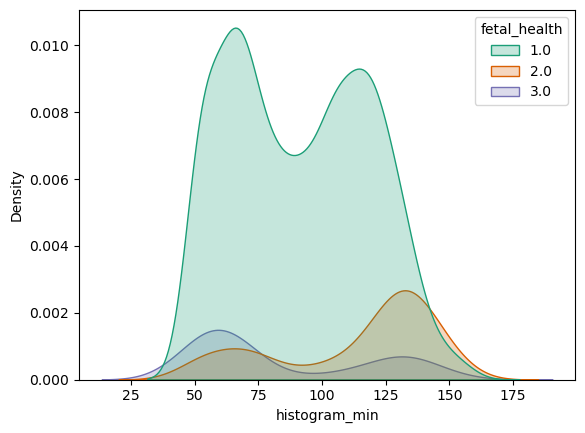

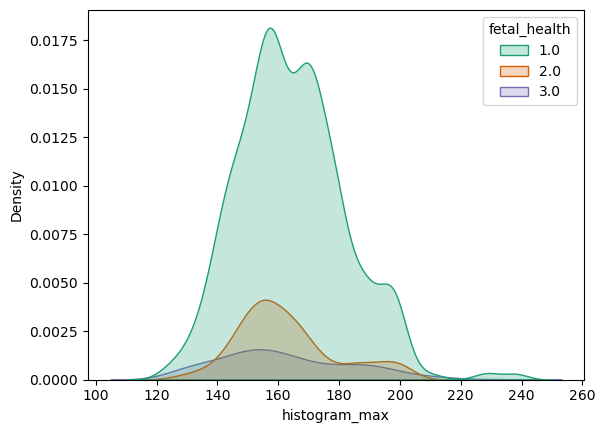

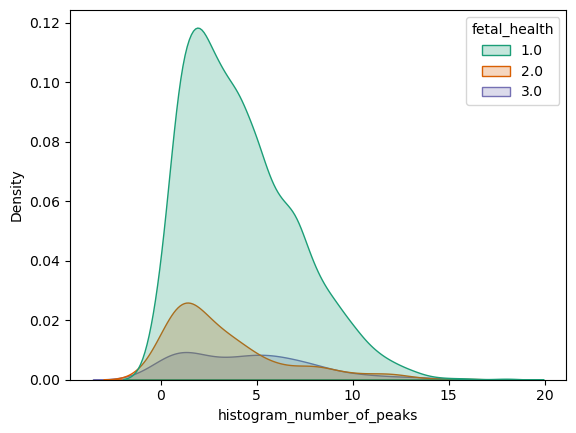

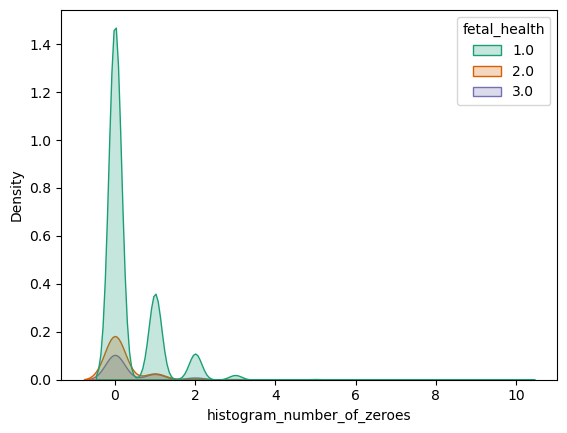

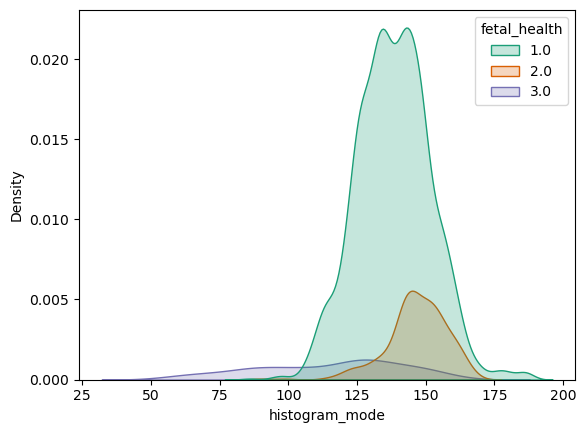

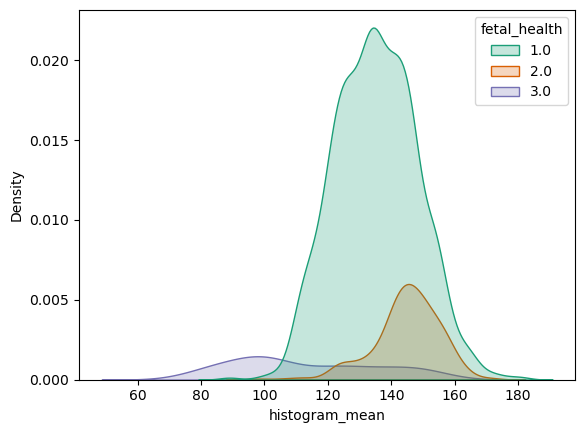

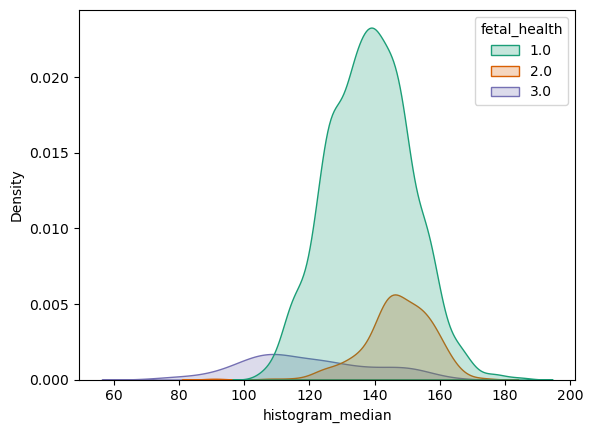

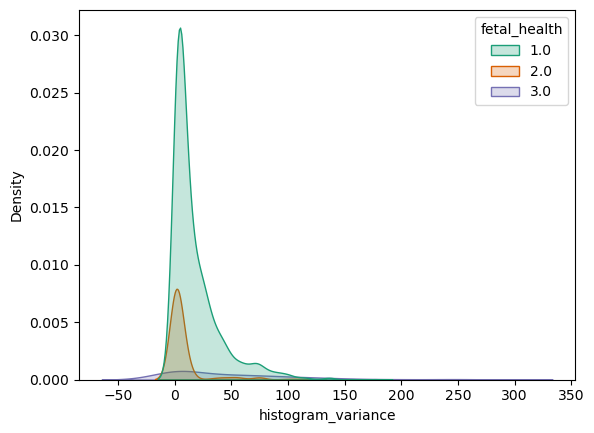

In [19]:
for i in kde_column:
    sns.kdeplot(data=data,x=i,hue='fetal_health',palette='Dark2',fill=True)
    plt.show()

### Correlation

In [20]:
data.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,-0.142363,0.298631,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,0.011047,0.162790,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,-0.066058,0.142541,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,-0.242932,0.520467,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,-0.037667,0.044880,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,-0.226514,0.265391,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,0.073892,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,-0.171114,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


In [21]:
def highly_corr(data):
    
    
    df2 = data.corr()
    
    filteredDf = df2[((df2 >= .5) | (df2 <= -.5)) & (df2 !=1.000)]
    plt.figure(figsize=(12,8))
    sns.heatmap(filteredDf, annot=True, cmap="Reds")
    plt.show()
    
    df1 = pd.DataFrame(df2.unstack(),columns=['corr_value'])
    
    filtered_df = pd.DataFrame(df1[((df1['corr_value'] >= .6) | (df1['corr_value'] <= -.6)) & (df1['corr_value'] !=1.000)])
    
    
    filtered_df.reset_index(inplace=True)
    
    filtered_df.sort_values(by='corr_value',ascending=False,inplace=True)
    filtered_df.drop_duplicates(inplace=True,subset='corr_value',keep='first')
    print("\n shape of data",filtered_df.shape)

    return filtered_df   

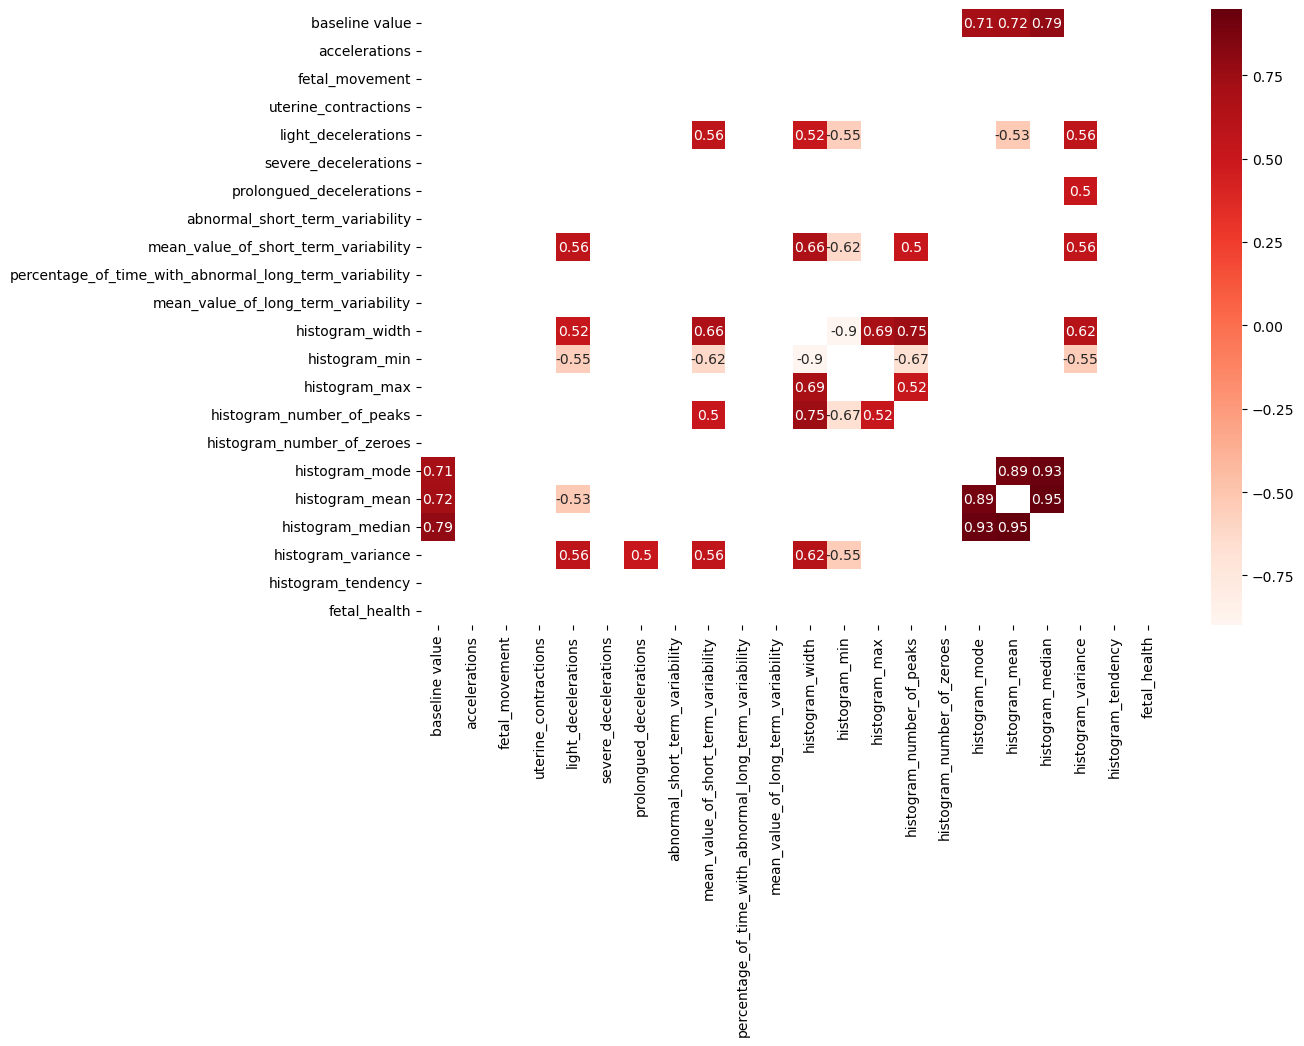


 shape of data (13, 3)


,level_0,level_1,corr_value
24,histogram_median,histogram_mean,0.948251
23,histogram_median,histogram_mode,0.933399
20,histogram_mean,histogram_mode,0.893412
2,baseline value,histogram_median,0.789246
14,histogram_number_of_peaks,histogram_width,0.747071
19,histogram_mean,baseline value,0.723121
0,baseline value,histogram_mode,0.708993
13,histogram_max,histogram_width,0.690769
5,histogram_width,mean_value_of_short_term_variability,0.660847
9,histogram_width,histogram_variance,0.615884


In [22]:
highly_corr(data)

### Splitting into Dependent and Independent columns

In [23]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X.shape, y.shape

((2126, 21), (2126,))

### Splitting into train and test

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=45)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1700, 21), (426, 21), (1700,), (426,))

In [26]:
y_train.value_counts(normalize=True)

1.0    0.778235
2.0    0.138824
3.0    0.082941
Name: fetal_health, dtype: float64

In [27]:
y_test.value_counts(normalize=True)

1.0    0.779343
2.0    0.138498
3.0    0.082160
Name: fetal_health, dtype: float64

### Imp libraries

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold, cross_val_score

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Random Forest without any treatment

test score = 94.36%

train score = 94.76%

In [32]:
rfc = RandomForestClassifier(n_jobs=-1)

In [33]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [34]:
y_pred = rfc.predict(X_test)
y_pred

array([3., 2., 1., 1., 3., 3., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 3., 1., 1., 2., 1., 1., 3., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2.,
       2., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 1., 1., 1., 1., 2., 1., 3., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 3., 1., 3., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 3., 3., 1., 3., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 2., 1., 2., 2., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [35]:
print("testing score of vanilla random forest : ","%.3f"%(accuracy_score(y_test,y_pred)*100),"%")

testing score of vanilla random forest :  95.775 %


In [36]:
print("training score of vanilla random forest : ","%.3f"%(accuracy_score(y_train,rfc.predict(X_train))*100),"%")

training score of vanilla random forest :  99.882 %


In [37]:
skf = StratifiedKFold(n_splits = 10,shuffle=True)

In [38]:
print(cross_val_score(rfc,X,y,cv=skf).mean())

0.9430795464611569


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       332
         2.0       0.91      0.83      0.87        59
         3.0       1.00      0.89      0.94        35

    accuracy                           0.96       426
   macro avg       0.96      0.90      0.93       426
weighted avg       0.96      0.96      0.96       426



#### Hyper paramater tuning

In [43]:
skf = StratifiedKFold()

In [44]:
# Number of Trees in Random forest
n_estimators = [100,150,200]

# number of features/columns to be considered at every split
max_features = ['auto', 'sqrt', 'log2',None]

# maximum number of levels in a tree
max_depth = [2,8,10,20,25,None] # None here means full grown Decision tree

# Max number of samples/rows
max_samples = [0.5,0.75]

criterion = ['gini','entropy']

ccp_alpha = [0,0.0001,0.005,0.009]


In [45]:
# Number of Trees in Random forest
n_estimators = [100,150]

# number of features/columns to be considered at every split
max_features = ['auto', 'sqrt', 'log2']

# maximum number of levels in a tree
max_depth = [10,20,None] # None here means full grown Decision tree

# Max number of samples/rows
max_samples = [0.5,0.75]

criterion = ['entropy']

ccp_alpha = [0.005,0.009]

In [46]:
param_grid = {'n_estimators': n_estimators,
              'ccp_alpha' : ccp_alpha,
              'criterion' : criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'max_samples': max_samples
             }

print(param_grid)

{'n_estimators': [100, 150], 'ccp_alpha': [0.005, 0.009], 'criterion': ['entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, None], 'max_samples': [0.5, 0.75]}


In [47]:
rf_grid = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=param_grid,n_jobs=-1,verbose=2,cv=10,return_train_score=True)

rf_grid.fit(X,y)

rf_grid.best_params_

rf_grid.best_score_

In [42]:
hyper_df = pd.DataFrame(rf_grid.cv_results_).sort_values(by='mean_test_score',ascending=False)
hyper_df.head(3)

NameError: name 'rf_grid' is not defined

In [148]:
hyper_df[['mean_test_score','mean_train_score','param_ccp_alpha','param_criterion','param_max_depth','param_max_features','param_max_samples','param_n_estimators','rank_test_score']].head()

,mean_test_score,mean_train_score,param_ccp_alpha,param_criterion,param_max_depth,param_max_features,param_max_samples,param_n_estimators,rank_test_score
59,0.893184,0.943085,0.009,entropy,20,log2,0.75,150,1
68,0.892242,0.946325,0.009,entropy,None,log2,0.5,100,2
50,0.891299,0.943294,0.009,entropy,20,auto,0.75,100,3
41,0.890356,0.945437,0.009,entropy,10,sqrt,0.5,150,4
4,0.889873,0.967806,0.005,entropy,10,sqrt,0.5,100,5


In [186]:
hyper_df[['params']]

params    {'ccp_alpha': 0.005, 'criterion': 'entropy', '...
Name: 0, dtype: object

##### training random forest with the parameters

In [187]:
rfc1 = RandomForestClassifier(criterion='entropy',n_estimators=150,max_samples=0.75,n_jobs=-1,ccp_alpha=0.009,max_features='log2',max_depth=20)

In [188]:
rfc1.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.009, criterion='entropy', max_depth=20,
                       max_features='log2', max_samples=0.75, n_estimators=150,
                       n_jobs=-1)

In [189]:
y_pred1 = rfc1.predict(X_test)
y_pred1

array([3., 2., 1., 1., 3., 3., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 3., 1., 1., 2., 1., 1., 3., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 1., 1., 1., 1., 2., 1., 3., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 3., 1., 3., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 3., 3., 1., 3., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 2., 2., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [190]:
accuracy_score(y_test,y_pred1)

0.9413145539906104

In [191]:
accuracy_score(y_train,rfc1.predict(X_train))

0.9423529411764706

In [192]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96       332
         2.0       0.91      0.69      0.79        59
         3.0       1.00      0.89      0.94        35

    accuracy                           0.94       426
   macro avg       0.95      0.86      0.90       426
weighted avg       0.94      0.94      0.94       426



In [193]:
random_forest_classifcation = classification_report(y_test,y_pred1)
print(random_forest_classifcation)

              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96       332
         2.0       0.91      0.69      0.79        59
         3.0       1.00      0.89      0.94        35

    accuracy                           0.94       426
   macro avg       0.95      0.86      0.90       426
weighted avg       0.94      0.94      0.94       426



# KNN without treatment

testing score of knn :  89.437 %

training score of knn :  90.647 %

In [195]:
knn = KNeighborsClassifier()

In [196]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [197]:
y_pred = knn.predict(X_test)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([3., 1., 1., 1., 2., 3., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 2., 3., 1., 1., 2., 1., 1., 3., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 3., 1., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 3., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 3., 3., 1., 3., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
       1., 1., 1., 2., 2., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2.

In [199]:
print("testing score of vanilla random forest : ","%.3f"%(accuracy_score(y_test,y_pred)*100),"%")

testing score of vanilla random forest :  89.671 %


In [201]:
print("training score of vanilla random forest : ","%.3f"%(accuracy_score(y_train,knn.predict(X_train))*100),"%")

training score of vanilla random forest :  92.353 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [202]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94       332
         2.0       0.70      0.63      0.66        59
         3.0       0.90      0.74      0.81        35

    accuracy                           0.90       426
   macro avg       0.84      0.78      0.81       426
weighted avg       0.89      0.90      0.89       426



In [204]:
n_neighbors = [5,10,15,20]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [10,15,20,25]
p = [1,2]



In [212]:
param_grid = {'n_neighbors': n_neighbors,
              'weights' : weights,
              'algorithm' : algorithm,
              'leaf_size': leaf_size,
              'p': p
             }

In [213]:
skf = StratifiedKFold()

In [217]:
rf_grid = GridSearchCV(KNeighborsClassifier(n_jobs=-1),param_grid=param_grid,scoring='accuracy',cv=skf,n_jobs=-1,verbose=2,return_train_score=True)

In [218]:
rf_grid.fit(X,y)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'n_neighbors': [5, 10, 15, 20], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=2)

In [219]:
rf_grid.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [222]:
rf_grid.best_score_

0.8353648163490748

In [225]:
hyper_df = pd.DataFrame(rf_grid.cv_results_).sort_values(by='mean_test_score',ascending=False)
hyper_df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
54,0.009918,0.001579,1.150857,0.046055,ball_tree,20,10,2,uniform,"{'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}",0.849765,0.84,0.891765,0.849412,0.745882,0.835365,0.048196,1,0.914118,0.901822,0.892416,0.912404,0.917695,0.907691,0.009288
86,0.011395,0.002395,1.399774,0.115450,ball_tree,40,10,2,uniform,"{'algorithm': 'ball_tree', 'leaf_size': 40, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}",0.849765,0.84,0.891765,0.849412,0.745882,0.835365,0.048196,1,0.914118,0.901822,0.892416,0.912404,0.917695,0.907691,0.009288
166,0.005270,0.000591,0.999097,0.040356,brute,30,10,2,uniform,"{'algorithm': 'brute', 'leaf_size': 30, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}",0.849765,0.84,0.891765,0.849412,0.745882,0.835365,0.048196,1,0.914118,0.901822,0.892416,0.912404,0.917695,0.907691,0.009288


In [229]:
hyper_df[['params','mean_test_score','mean_train_score']]

,params,mean_test_score,mean_train_score
54,"{'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}",0.835365,0.907691
86,"{'algorithm': 'ball_tree', 'leaf_size': 40, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}",0.835365,0.907691
166,"{'algorithm': 'brute', 'leaf_size': 30, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}",0.835365,0.907691
38,"{'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}",0.835365,0.907691
6,"{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}",0.835365,0.907691
...,...,...,...
177,"{'algorithm': 'brute', 'leaf_size': 40, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",0.810909,0.999294
113,"{'algorithm': 'kd_tree', 'leaf_size': 30, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",0.810909,0.999294
129,"{'algorithm': 'kd_tree', 'leaf_size': 40, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",0.810909,0.999294
145,"{'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",0.810909,0.999294


In [251]:
knn = KNeighborsClassifier(n_neighbors=10,algorithm='ball_tree',p=1,weights='uniform',n_jobs=-1)

In [252]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=10, p=1)

In [253]:
y_pred = knn.predict(X_test)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([3., 1., 1., 1., 3., 3., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 2., 3., 1., 1., 2., 1., 1., 3., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 2., 1., 3., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 3., 1., 1., 3., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
       1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2.

In [259]:
print("testing score of knn : ","%.3f"%(accuracy_score(y_test,y_pred)*100),"%")

testing score of knn :  89.437 %


In [258]:
print("training score of knn : ","%.3f"%(accuracy_score(y_train,knn.predict(X_train))*100),"%")

training score of knn :  90.647 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [257]:
knn_classifcation = classification_report(y_test,y_pred)
print(knn_classifcation)

              precision    recall  f1-score   support

         1.0       0.91      0.97      0.94       332
         2.0       0.72      0.58      0.64        59
         3.0       1.00      0.69      0.81        35

    accuracy                           0.89       426
   macro avg       0.88      0.74      0.80       426
weighted avg       0.89      0.89      0.89       426



# Gradient Boosting without treatment

In [6]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [7]:
data[data.duplicated()]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,10.3,60.0,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,13.8,74.0,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,5.8,21.0,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,6.9,97.0,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
333,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,10.6,81.0,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
787,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,15.4,90.0,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
791,123.0,0.003,0.004,0.000,0.0,0.0,0.0,50.0,0.9,4.0,14.8,82.0,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
798,146.0,0.000,0.000,0.003,0.0,0.0,0.0,65.0,0.4,39.0,7.0,19.0,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
849,138.0,0.002,0.000,0.004,0.0,0.0,0.0,41.0,0.8,8.0,10.3,51.0,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0
1113,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0


In [8]:
data.shape

(2126, 22)

In [9]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

### Dependent variable 

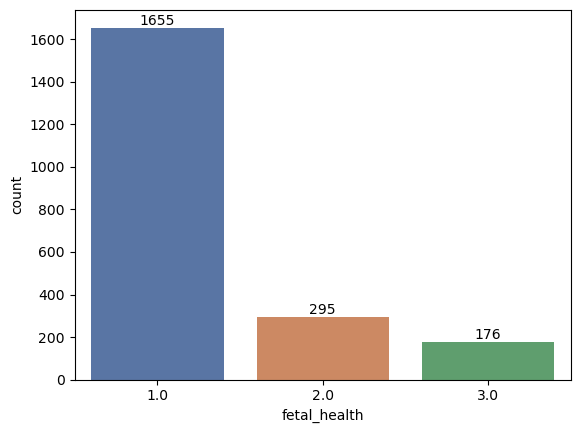

In [10]:
ax = sns.countplot(data=data, x = 'fetal_health',palette='deep')
ax.bar_label(ax.containers[0])
plt.show()

### NOTE:

Target labels are highly imbalanced as can be seen from the plot.

### Correlation

In [11]:
def highly_corr(data):
    
    
    df2 = data.corr()
    
    filteredDf = df2[((df2 >= .5) | (df2 <= -.5)) & (df2 !=1.000)]
    plt.figure(figsize=(12,8))
    sns.heatmap(filteredDf, annot=True, cmap="Reds")
    plt.show()
    
    df1 = pd.DataFrame(df2.unstack(),columns=['corr_value'])
    
    filtered_df = pd.DataFrame(df1[((df1['corr_value'] >= .4) | (df1['corr_value'] <= -.4)) & (df1['corr_value'] !=1.000)])
    
    
    filtered_df.reset_index(inplace=True)
    
    filtered_df.sort_values(by='corr_value',ascending=False,inplace=True)
    filtered_df.drop_duplicates(inplace=True,subset='corr_value',keep='first')
    print("\n shape of data",filtered_df.shape)

    return filtered_df   

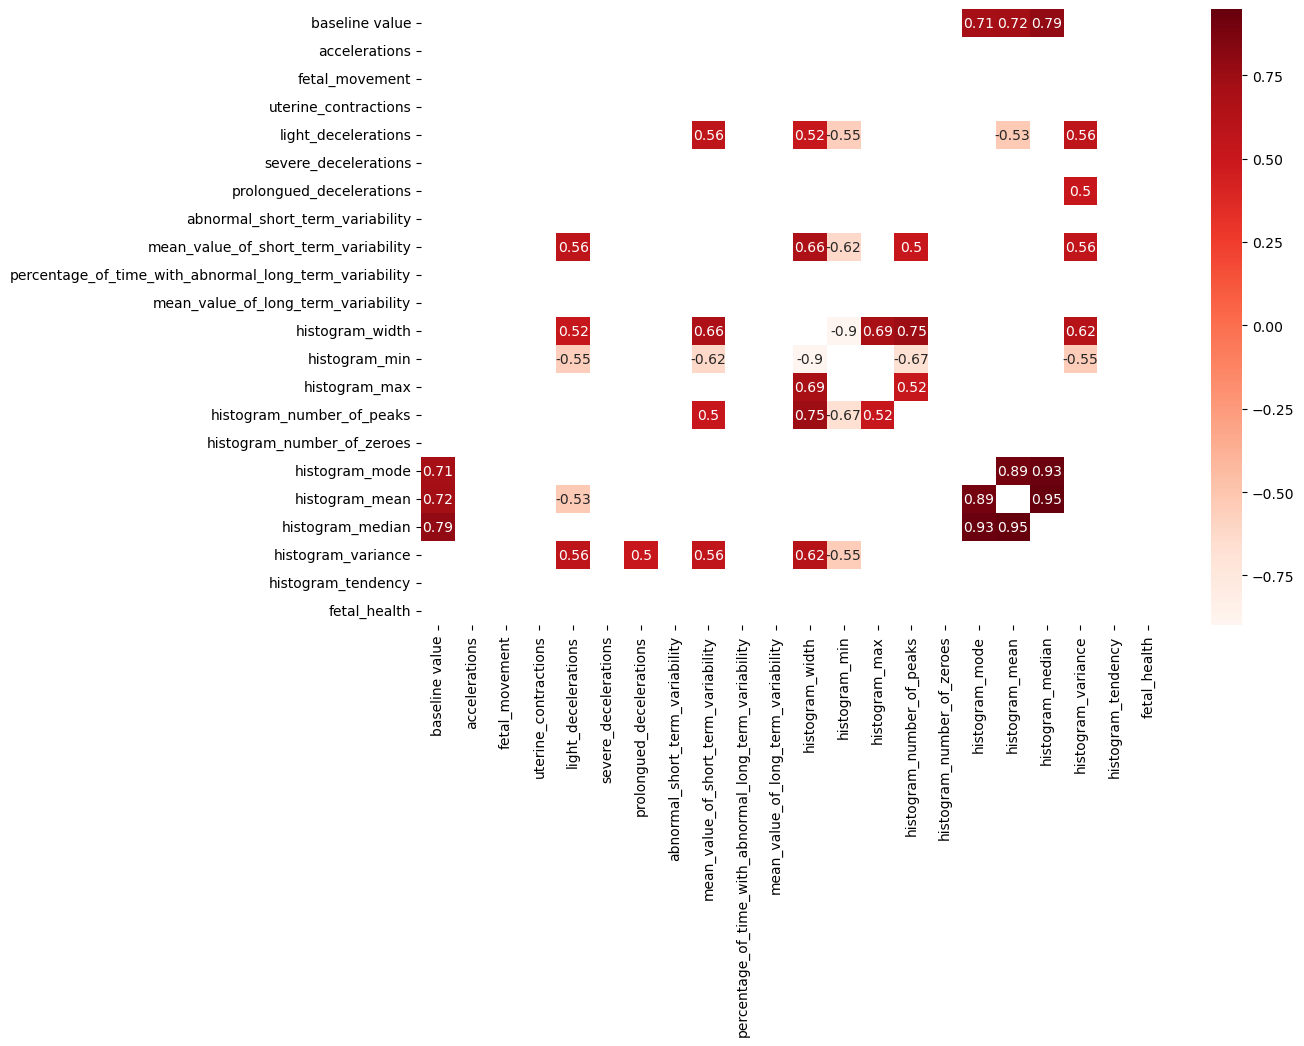


 shape of data (41, 3)


,level_0,level_1,corr_value
70,histogram_median,histogram_mean,0.948251
57,histogram_mode,histogram_median,0.933399
56,histogram_mode,histogram_mean,0.893412
66,histogram_median,baseline value,0.789246
50,histogram_number_of_peaks,histogram_width,0.747071
1,baseline value,histogram_mean,0.723121
54,histogram_mode,baseline value,0.708993
46,histogram_max,histogram_width,0.690769
31,histogram_width,mean_value_of_short_term_variability,0.660847
36,histogram_width,histogram_variance,0.615884


In [12]:
highly_corr(data)

In [13]:
data.corr()['fetal_health'].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

### NOTE:

among all the columns with relation to the __output column:__ 


- __Positive Correlation:__
<br></br>    
    - prolongued_decelerations: 0.484859
<br></br>
    - abnormal_short_term_variability: 0.471191
<br></br>
    - percentage_of_time_with_abnormal_long_term_variability: 0.426146
    
<br></br>    
- __No correlation : less than |0.1|__
<br></br>
    - histogram_min: 0.063175
<br></br>
    - light_decelerations: 0.058870
<br></br>
    - histogram_number_of_zeroes: -0.016682

### Outlier detection

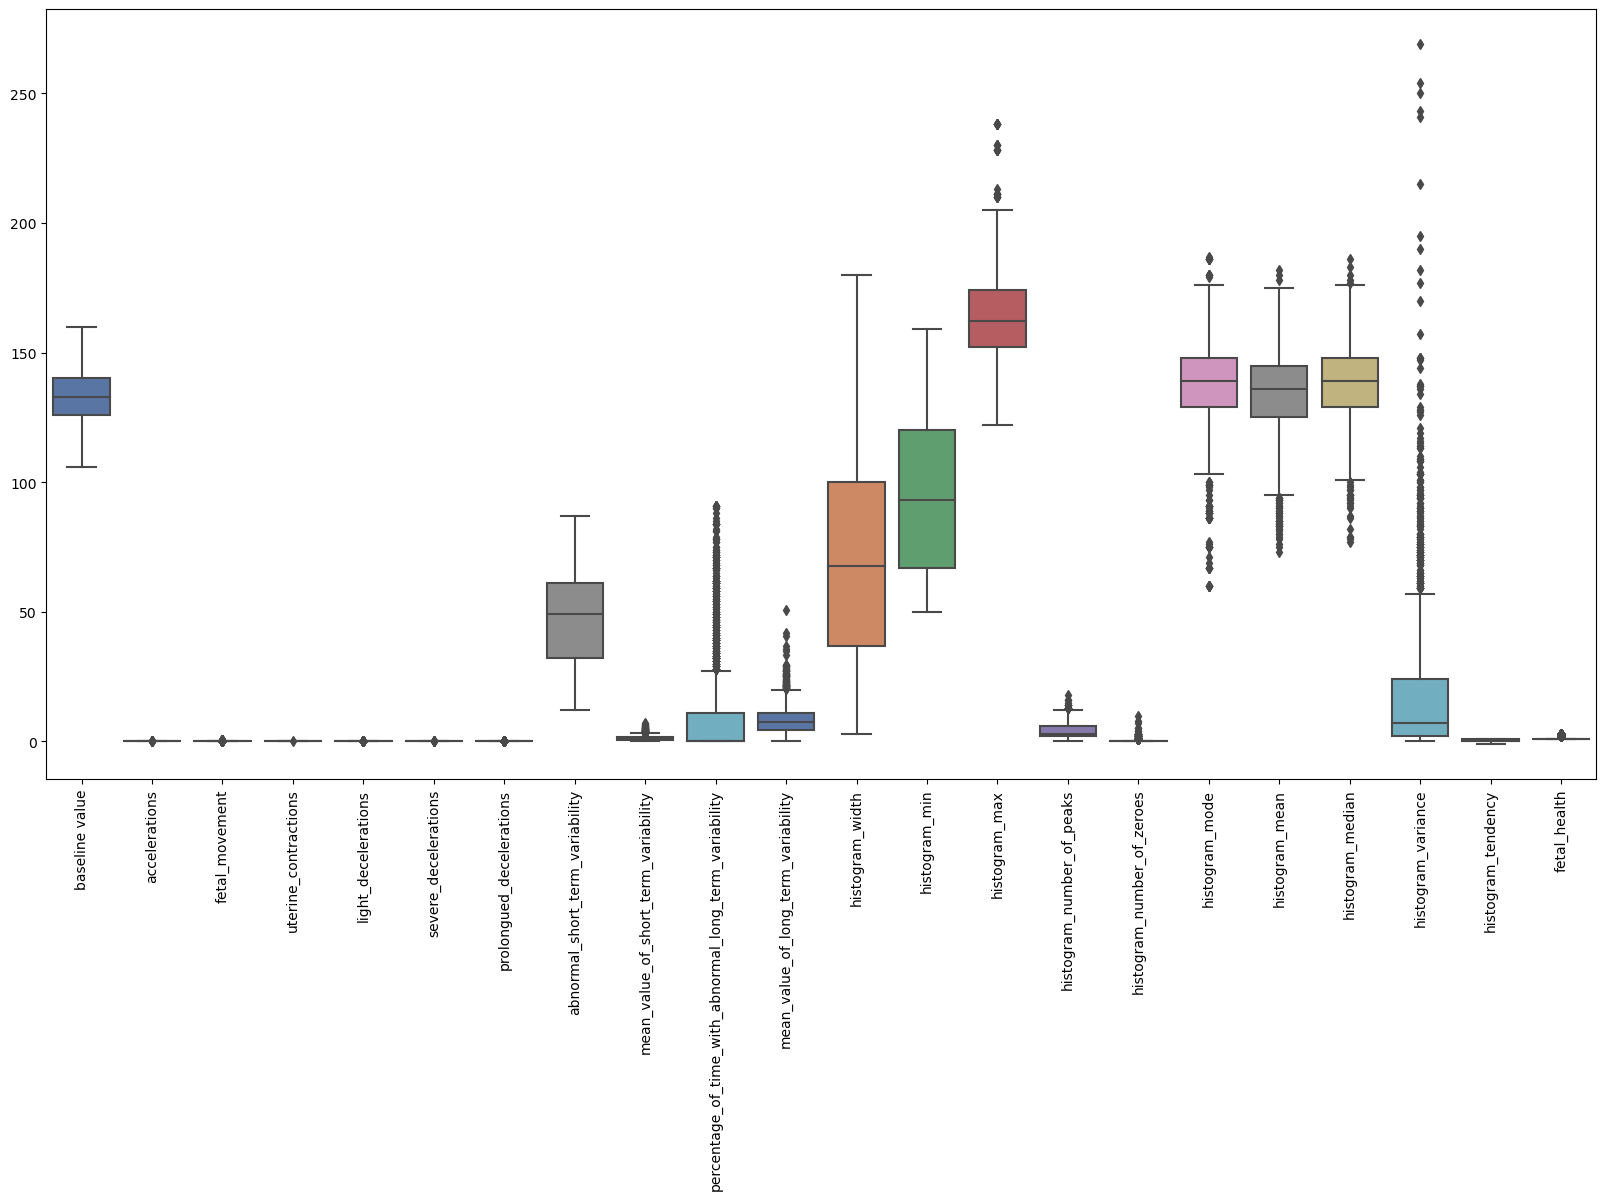

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data,palette='deep')
plt.xticks(rotation=90)
plt.show()

Right skewed : 

- histogram_variance
- percentage_of_time_with_abnormal_long_term_variability
- histogram_max
- mean_value_of_short_term_variability

Assuming outliers aren't cause of the typo or measurement error (human error) we aren't taking it down to avoid the overfitting of the model as well as the loss of information.

### Splitting of data

In [15]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X.shape, y.shape

((2126, 21), (2126,))

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1700, 21), (426, 21), (1700,), (426,))

In [18]:
y_train.value_counts(normalize=True)

1.0    0.778235
2.0    0.138824
3.0    0.082941
Name: fetal_health, dtype: float64

In [19]:
y_test.value_counts(normalize=True)

1.0    0.779343
2.0    0.138498
3.0    0.082160
Name: fetal_health, dtype: float64

In [261]:
gbc = GradientBoostingClassifier()

In [262]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [263]:
y_pred = gbc.predict(X_test)
y_pred

array([3., 2., 1., 1., 3., 3., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 3., 1., 1., 2., 1., 1., 3., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 3., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 3., 1., 2.,
       2., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 1., 1., 1., 1., 2., 1., 3., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 3., 1., 3., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 3., 3., 1., 3., 1., 2., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 2., 2., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [264]:
accuracy_score(y_test,y_pred)

0.9553990610328639

In [265]:
print("testing score of gradient Boosting : ","%.3f"%(accuracy_score(y_test,y_pred)*100),"%")

testing score of gradient Boosting :  95.540 %


In [267]:
print("training score of Gradient Boosting : ","%.3f"%(accuracy_score(y_train,gbc.predict(X_train))*100),"%")

training score of Gradient Boosting :  99.176 %


In [269]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Scaling of data

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled 

array([[-0.43040726,  0.94785277, -0.00367084, ..., -0.63692832,
         2.30981823, -0.52645095],
       [-0.43040726, -0.829838  , -0.1574841 , ..., -0.4269791 ,
        -0.58566654,  1.10372503],
       [ 0.1836003 ,  1.20180859, -0.20143074, ...,  0.55278397,
        -0.30990609, -0.52645095],
       ...,
       [ 0.49060408, -0.06797053, -0.1574841 , ...,  0.13288551,
         0.24161482,  1.10372503],
       [-2.37476454,  0.1859853 , -0.20143074, ..., -2.24653907,
         1.44806681, -2.15662692],
       [ 0.28593489,  2.47158772, -0.20143074, ...,  0.48280089,
        -0.44778631, -0.52645095]])

In [23]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X.columns)
X_train_scaled

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-0.430407,0.947853,-0.003671,1.583053,3.425046,-0.048564,-0.268823,-1.442255,4.468198,-0.533950,-1.459816,1.921960,-1.477785,1.728212,3.084005,0.949833,0.093525,-0.824847,-0.636928,2.309818,-0.526451
1,-0.430407,-0.829838,-0.157484,-1.497287,-0.647399,-0.048564,-0.268823,0.065994,-0.495712,0.169286,0.561293,0.011360,-0.933783,-1.507734,-1.052605,-0.467828,-0.402553,-0.303931,-0.426979,-0.585667,1.103725
2,0.183600,1.201809,-0.201431,0.214013,-0.647399,-0.048564,-0.268823,0.646090,-0.380272,-0.533950,-0.611672,-0.324286,0.664222,0.389200,-0.363170,-0.467828,0.217545,0.607671,0.552784,-0.309906,-0.526451
3,-1.146749,-0.829838,-0.201431,0.898533,0.370712,-0.048564,-0.268823,-0.920169,-0.380272,-0.155285,0.254517,-0.995577,0.256221,-1.730903,-0.707888,-0.467828,-0.898630,-0.824847,-0.986844,-0.551196,1.103725
4,2.537296,0.439941,-0.201431,1.240793,-0.647399,-0.048564,-0.268823,-1.036188,-0.033953,-0.533950,0.850023,-0.401742,1.650225,1.839796,-0.018453,-0.467828,2.015827,2.365762,2.372344,-0.344376,-0.526451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,-0.123403,1.201809,-0.201431,-0.812767,1.049453,-0.048564,-0.268823,-1.558274,0.889565,-0.533950,-0.016167,0.811747,-0.661782,0.668160,1.705135,2.367495,0.217545,0.086755,0.132886,0.172675,-0.526451
1696,-0.328073,0.185985,-0.201431,1.583053,2.406934,-0.048564,-0.268823,-1.268226,0.427806,-0.533950,-1.459816,0.605195,-0.593782,0.333407,0.670983,-0.467828,-0.278533,-1.020191,-1.196793,1.861707,-0.526451
1697,0.490604,-0.067971,-0.157484,0.556273,1.728194,-0.048564,-0.268823,0.182014,1.120445,-0.533950,-0.629718,0.811747,-0.797783,0.444992,1.015700,-0.467828,0.031516,0.021641,0.132886,0.241615,1.103725
1698,-2.374765,0.185985,-0.201431,1.583053,1.049453,-0.048564,-0.268823,0.936138,1.582204,-0.533950,-1.134995,2.722346,-1.069783,4.127275,1.705135,-0.467828,-2.634903,-2.387595,-2.246539,1.448067,-2.156627


In [1]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X.columns)
X_test_scaled.head()

NameError: name 'scaler' is not defined

In [25]:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,1700.0,-1.170567e-15,1.000294,-2.784103,-0.737411,-0.021069,0.695273,2.741965
accelerations,1700.0,-7.862991e-17,1.000294,-0.829838,-0.829838,-0.321926,0.693897,3.995323
fetal_movement,1700.0,6.596031e-18,1.000294,-0.201431,-0.201431,-0.201431,-0.157484,10.367737
uterine_contractions,1700.0,-2.488042e-16,1.000294,-1.497287,-0.812767,0.214013,0.898533,3.636613
light_decelerations,1700.0,-1.195122e-17,1.000294,-0.647399,-0.647399,-0.647399,0.370712,4.443157
severe_decelerations,1700.0,3.725778e-17,1.000294,-0.048564,-0.048564,-0.048564,-0.048564,20.591260
prolongued_decelerations,1700.0,8.992806e-17,1.000294,-0.268823,-0.268823,-0.268823,-0.268823,8.162907
abnormal_short_term_variability,1700.0,1.361003e-16,1.000294,-2.022351,-0.862159,0.124004,0.820119,2.328368
mean_value_of_short_term_variability,1700.0,2.520859e-17,1.000294,-1.303790,-0.726591,-0.149393,0.427806,5.738035
percentage_of_time_with_abnormal_long_term_variability,1700.0,-8.529125e-17,1.000294,-0.533950,-0.533950,-0.533950,0.020524,4.388699


In [26]:
X_test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,426.0,0.050037,1.033843,-2.784103,-0.737411,-0.021069,0.874359,2.537296
accelerations,426.0,-0.113277,0.899047,-0.829838,-0.829838,-0.575882,0.439941,3.741367
fetal_movement,426.0,0.034396,1.120855,-0.201431,-0.201431,-0.201431,-0.135511,10.279844
uterine_contractions,426.0,-0.014160,1.040866,-1.497287,-0.812767,-0.128247,0.556273,3.294353
light_decelerations,426.0,-0.030796,1.022456,-0.647399,-0.647399,-0.647399,0.370712,4.443157
severe_decelerations,426.0,0.096787,1.727975,-0.048564,-0.048564,-0.048564,-0.048564,20.591260
prolongued_decelerations,426.0,-0.007559,0.973983,-0.268823,-0.268823,-0.268823,-0.268823,6.476561
abnormal_short_term_variability,426.0,0.036990,0.986113,-1.964341,-0.804149,0.065994,0.820119,2.154339
mean_value_of_short_term_variability,426.0,0.019431,1.094412,-1.303790,-0.726591,-0.149393,0.427806,6.546113
percentage_of_time_with_abnormal_long_term_variability,426.0,-0.006460,0.975645,-0.533950,-0.533950,-0.533950,0.101667,4.388699


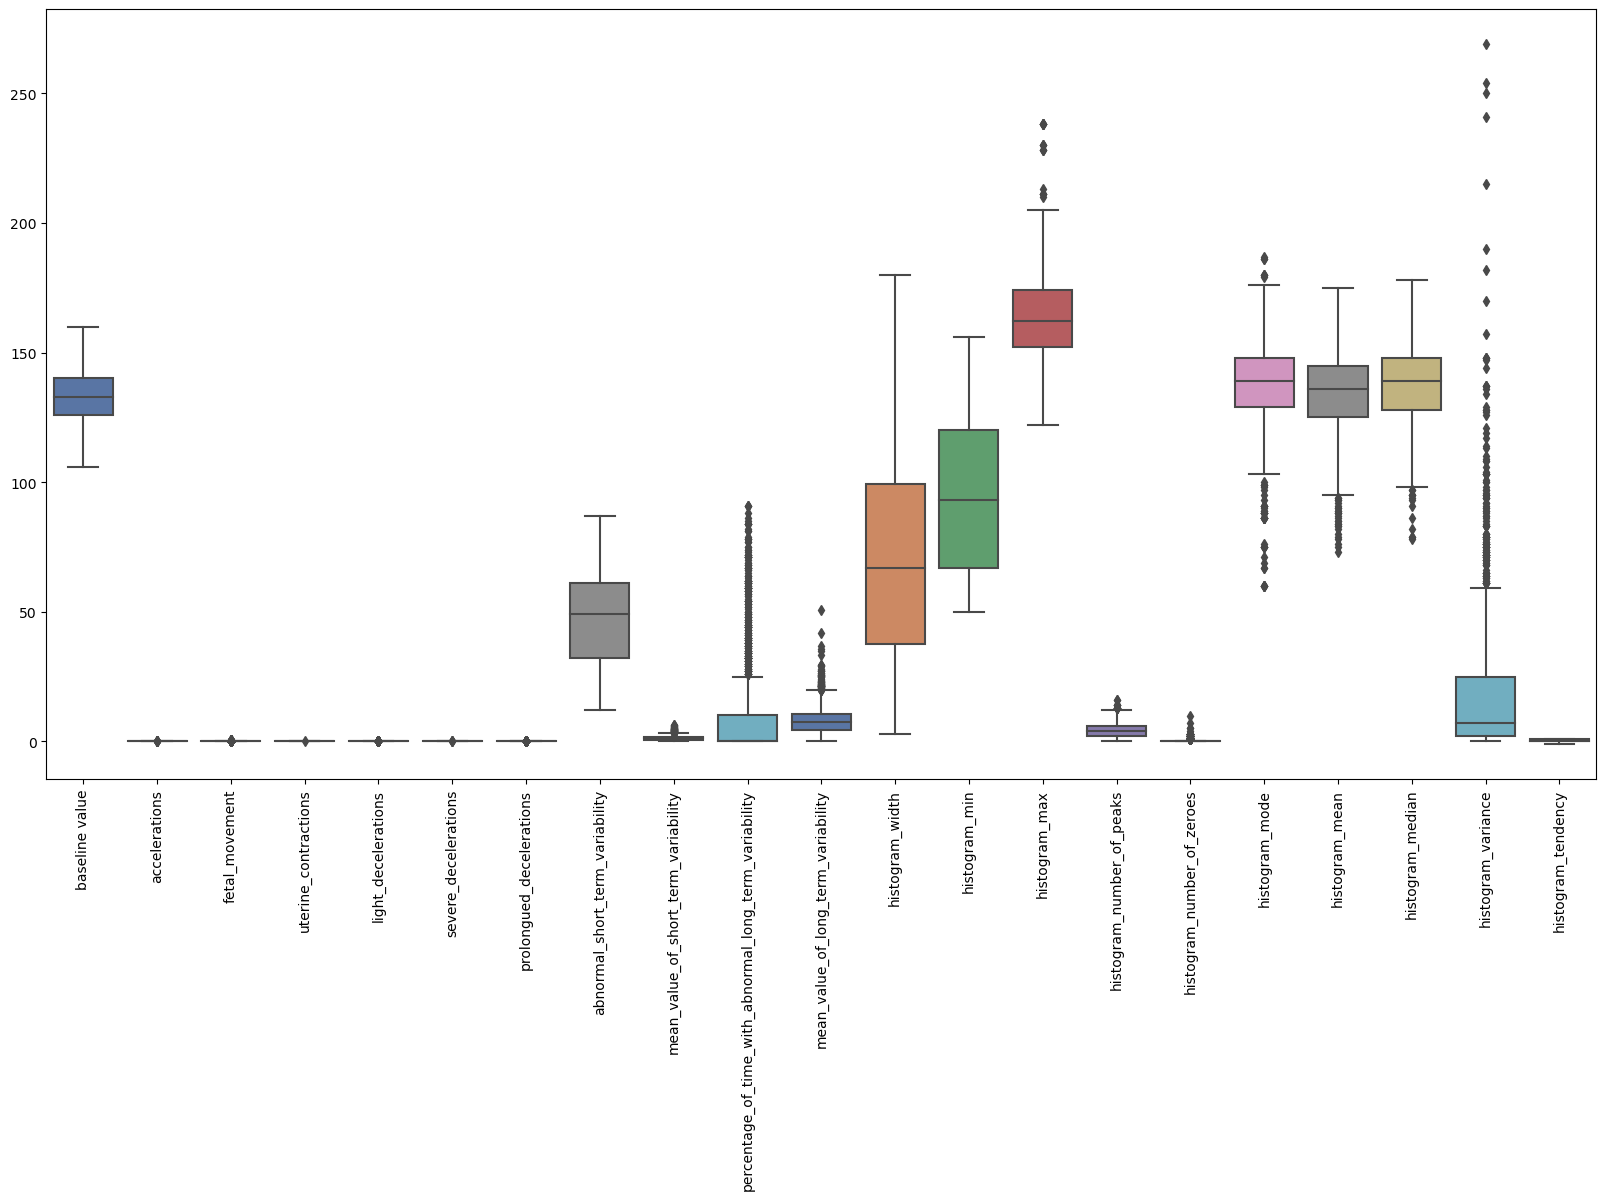

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(data=X_train,palette='deep')
plt.xticks(rotation=90)
plt.show()

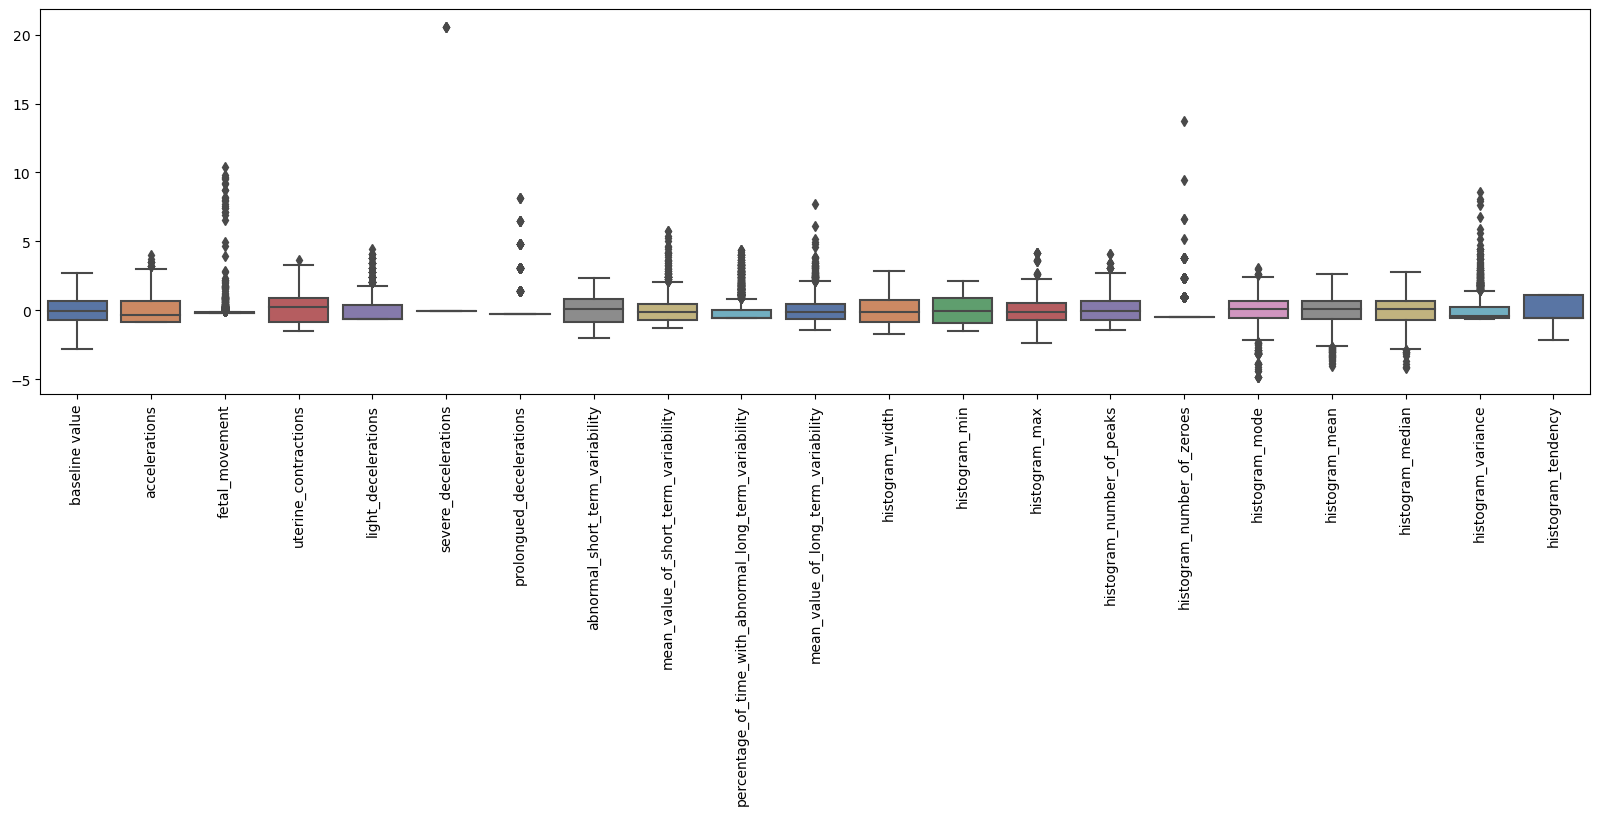

In [28]:
plt.figure(figsize=(20,5))
sns.boxplot(data=X_train_scaled,palette='deep')
plt.xticks(rotation=90)
plt.show()

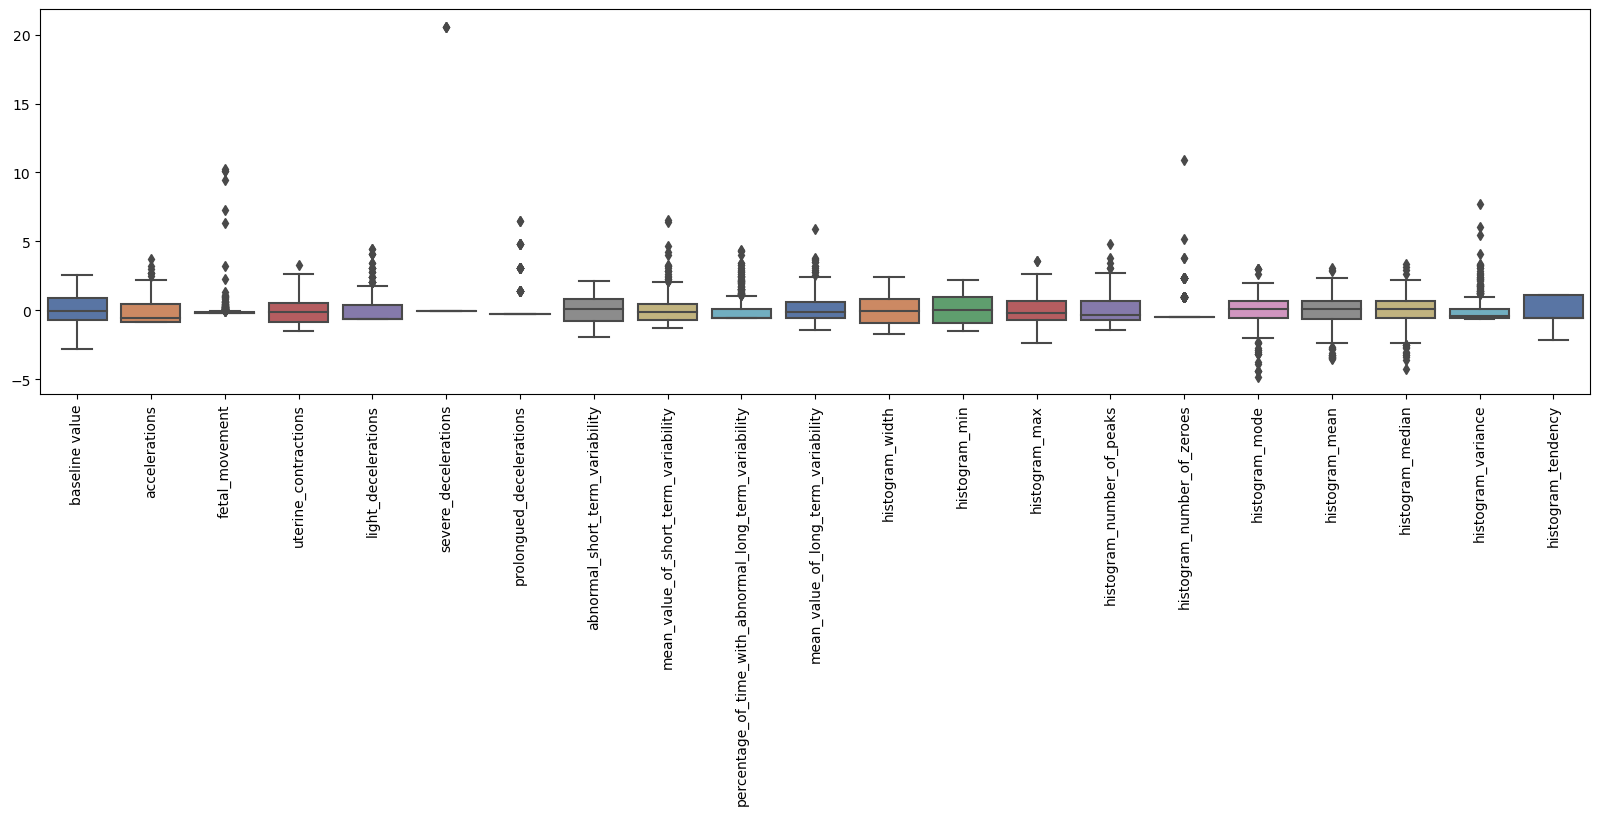

In [29]:
plt.figure(figsize=(20,5))
sns.boxplot(data=X_test_scaled,palette='deep')
plt.xticks(rotation=90)
plt.show()

### Model building

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
from sklearn.metrics import accuracy_score, classification_report

In [34]:
from sklearn.model_selection import cross_val_score,  StratifiedGroupKFold, GridSearchCV, StratifiedKFold

In [39]:
skf = StratifiedKFold(n_splits=5)

In [44]:
gbc = GradientBoostingClassifier()

In [51]:
np.mean(cross_val_score(gbc,X,y,cv=skf,n_jobs=-1,scoring='accuracy'))

0.8913338856669428

In [58]:
min_samples_split = [40,50,60]
min_samples_leaf = [10,15,20]
n_estimators = [200,400,500]
max_depth = [4,5,6]
max_features = [0.3,0.4,0.5]
learning_rate = [0.001,0.005,0.009,0.1]
criterion = ['friedman_mse', 'squared_error']



In [59]:
param_grid = {'min_samples_split': min_sample_split,
              'min_samples_leaf' : min_sample_leaf,
              'n_estimators' : n_estimators,
              'criterion': criterion,
              'max_depth':max_depth,
              'max_features':max_features,
              'learning_rate':learning_rate,
              'criterion':criterion         
             }

In [60]:
rf_grid = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=param_grid,verbose=2,n_jobs=-1,return_train_score=True)

In [62]:
rf_grid.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 0.4,
 'min_samples_leaf': 15,
 'min_samples_split': 60,
 'n_estimators': 500}

In [63]:
rf_grid.best_score_


0.9535294117647058

In [79]:
hyper_df = pd.DataFrame(rf_grid.cv_results_).sort_values(by='mean_test_score',ascending=False)
hyper_df.to_csv('hyperparamter_gradientboosting.csv')

In [65]:
hyper_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_learning_rate', 'param_max_depth',
       'param_max_features', 'param_min_samples_leaf',
       'param_min_samples_split', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [77]:
hyper_df[['mean_test_score','mean_train_score','param_criterion','param_learning_rate','param_max_depth',
       'param_max_features', 'param_min_samples_leaf',
       'param_min_samples_split', 'param_n_estimators']].iloc[5:10,:]

,mean_test_score,mean_train_score,param_criterion,param_learning_rate,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators
1910,0.952353,0.998824,squared_error,0.1,6,0.4,20,40,500
829,0.952353,0.998824,friedman_mse,0.1,5,0.3,20,40,400
961,0.952353,0.998824,friedman_mse,0.1,6,0.5,15,60,400
893,0.952353,0.998824,friedman_mse,0.1,6,0.3,10,40,500
1892,0.952353,0.998824,squared_error,0.1,6,0.4,10,40,500


In [70]:
hyper_df[['params']]

,params
1826,"{'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 5, 'max_features': 0.4, 'min_samples_leaf': 15, 'min_samples_split': 60, 'n_estimators': 500}"
1936,"{'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 6, 'max_features': 0.5, 'min_samples_leaf': 20, 'min_samples_split': 40, 'n_estimators': 400}"
766,"{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.4, 'min_samples_leaf': 15, 'min_samples_split': 40, 'n_estimators': 400}"
932,"{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 6, 'max_features': 0.4, 'min_samples_leaf': 15, 'min_samples_split': 50, 'n_estimators': 500}"
1868,"{'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 6, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 500}"
...,...
1054,"{'criterion': 'squared_error', 'learning_rate': 0.001, 'max_depth': 5, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 40, 'n_estimators': 400}"
1056,"{'criterion': 'squared_error', 'learning_rate': 0.001, 'max_depth': 5, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 200}"
1057,"{'criterion': 'squared_error', 'learning_rate': 0.001, 'max_depth': 5, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 400}"
1059,"{'criterion': 'squared_error', 'learning_rate': 0.001, 'max_depth': 5, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 60, 'n_estimators': 200}"


In [98]:
gbc_best = GradientBoostingClassifier(criterion = 'squared_error',
                           learning_rate=0.3,
                           max_depth=5,
                           max_features=0.4,
                           min_samples_leaf=15,
                          min_samples_split=60,
                          n_estimators=300,
                          verbose=1)

In [99]:
gbc_best.fit(X_train_scaled,y_train)

      Iter       Train Loss   Remaining Time 
         1           0.3720            2.27s
         2           0.2873            3.52s
         3           0.2325            3.96s
         4           0.1952            4.17s
         5           0.1686            4.29s
         6           0.1513            4.34s
         7           0.1346            4.74s
         8           0.1219            4.74s
         9           0.1103            4.71s
        10           0.1011            4.94s
        20           0.0472            4.77s
        30           0.0297            4.71s
        40           0.0183            4.43s
        50           0.0119            4.31s
        60           0.0079            4.19s
        70           0.0053            4.03s
        80           0.0037            3.80s
        90           0.0029            3.64s
       100           0.0025            3.50s
       200           0.0016            1.76s
       300           0.0016            0.00s


GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           max_depth=5, max_features=0.4, min_samples_leaf=15,
                           min_samples_split=60, n_estimators=300, verbose=1)

In [100]:
y_pred = gbc_best.predict(X_test_scaled)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 3., 1., 2., 1., 2., 1., 1., 3., 1.,
       1., 1., 1., 2., 3., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 3., 2., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 3., 1., 1., 2.,
       3., 2., 1., 3., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 1., 3., 3., 1., 1., 1., 2., 1., 1., 1., 1., 1., 3., 2., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
       3., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1.,
       1., 1., 3., 1., 1.

In [101]:
print("testing score of gradient Boosting : ","%.3f"%(accuracy_score(y_test,y_pred)*100),"%")

testing score of gradient Boosting :  96.948 %


In [102]:
print("testing score of gradient Boosting : ","%.3f"%(accuracy_score(y_train,gbc_best.predict(X_train_scaled))*100),"%")

testing score of gradient Boosting :  99.882 %


In [103]:
gradient_boosting_classifcation = classification_report(y_test,y_pred)
print(gradient_boosting_classifcation)

              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       332
         2.0       0.93      0.88      0.90        59
         3.0       0.89      0.97      0.93        35

    accuracy                           0.97       426
   macro avg       0.94      0.95      0.94       426
weighted avg       0.97      0.97      0.97       426



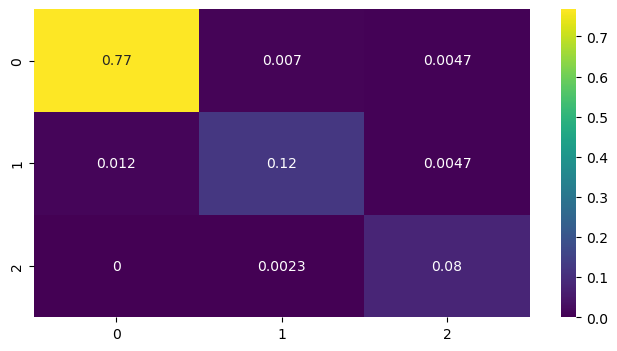

In [111]:
plt.subplots(figsize=(8,4))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='viridis',annot = True, annot_kws = {'size':10})
plt.show()